# TATA Online Retail Data Analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#!pip install kagglehub

In [4]:
import kagglehub
kagglehub.login()
#KAGGLE_USERNAME="arpandutta221"
#KAGGLE_KEY="833669cf8a9d8e99d6500ec815bfc6b4"

## Download the latest version

In [5]:
# Download latest version
path = kagglehub.dataset_download("ishanshrivastava28/tata-online-retail-dataset", force_download=True)
print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 29.0M/29.0M [00:09<00:00, 3.30MB/s]

Extracting files...


Path to dataset files: C:\Users\ADMIN\.cache\kagglehub\datasets\ishanshrivastava28\tata-online-retail-dataset\versions\1


In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df = pd.read_csv(r"C:\Users\ADMIN\.cache\kagglehub\datasets\ishanshrivastava28\tata-online-retail-dataset\versions\1/Online Retail Data Set.csv", encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


## Exploring the Dataset

In [4]:
df.shape

(541909, 8)

In [5]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# About This Data:
InvoiceNo: A unique identifier for each invoice or transaction.

StockCode: A code or identifier for the stock or product being sold.

Description: A description of the product being sold.

Quantity: The quantity of the product being sold in each transaction.

InvoiceDate: The date and time when the invoice or transaction occurred.

UnitPrice: The price of a single unit of the product.

CustomerID: A unique identifier for each customer.

Country: The country where the transaction took place or the customer is located.

Note: The dataset may contain NaN values, and almost 5000+ duplicates are present.

# Finding and Dropping Duplicate Values

In [7]:
# Finding duplicate rows
duplicates = df[df.duplicated()]
print("Duplicate rows: \n ", duplicates)

print("Total number of Dupicated Rows: ", df.duplicated().sum())

Duplicate rows: 
         InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

             InvoiceDate  UnitPrice  CustomerID         Country  
517     01-12-

### There are 5268 duplicate rows

In [8]:
original_row_count = df.shape[0]
print("Number of rows before dropping duplocates: ", original_row_count)

# Removing duplicates from the dataset
df = df.drop_duplicates()

# Display the number of rows before and after removing duplicates to confirm changes
cleaned_row_count = df.shape[0]
print("Number of rows after dropping duplicates: ", cleaned_row_count)

Number of rows before dropping duplocates:  541909
Number of rows after dropping duplicates:  536641


In [9]:
if df.duplicated().sum() == 0:
    print("Duplicates removed successfully")

Duplicates removed successfully


# Finding Missing Values

In [10]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [11]:
missing_values = df.isnull().sum()
nan_values = df.isna().sum()
duplicates = df.duplicated().sum()
unique_values = df.nunique()

# Create a summary DataFrame
columns_1 = pd.DataFrame({
    "missing_values": missing_values,
    "nan_values": nan_values,
    "duplicates": duplicates,
    "unique_values": unique_values,
})

columns_1

,missing_values,nan_values,duplicates,unique_values
InvoiceNo,0,0,0,25900
StockCode,0,0,0,4070
Description,1454,1454,0,4223
Quantity,0,0,0,722
InvoiceDate,0,0,0,23260
UnitPrice,0,0,0,1630
CustomerID,135037,135037,0,4372
Country,0,0,0,38


### This shows that the columns Description and CustomarID conatain missing values

## Handling Missing Values

In [12]:
# For categorical 'CustomerID', use mode imputation
imputer = SimpleImputer(strategy='most_frequent')
df['CustomerID'] = imputer.fit_transform(df[['CustomerID']])
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [13]:
# Precompute mode-based descriptions for each StockCode
description_impute = df.groupby('StockCode')['Description'].apply(lambda x: x.mode()[0] if not x.mode().empty else "Unknown Item")

# Fill missing descriptions
df['Description'] = df['Description'].fillna(df['StockCode'].map(description_impute))

# Checking for missing values after handling
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


All missing values are handled
Now we can proceed further as our data set is clean

## Convert Columns to Proper Datatype

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  536641 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   536641 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


### Looking into InvoiceDate and converting it

In [15]:
df['InvoiceDate'].info()

<class 'pandas.core.series.Series'>
Index: 536641 entries, 0 to 541908
Series name: InvoiceDate
Non-Null Count   Dtype 
--------------   ----- 
536641 non-null  object
dtypes: object(1)
memory usage: 8.2+ MB


In [16]:
#converting InvoiceDate to proper datatype
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')

In [17]:
df['InvoiceDate'].info()

<class 'pandas.core.series.Series'>
Index: 536641 entries, 0 to 541908
Series name: InvoiceDate
Non-Null Count   Dtype         
--------------   -----         
536641 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 8.2 MB


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  536641 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   536641 non-null  float64       
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


In [19]:
df['Quantity'] = pd.to_numeric(df['Quantity'])

In [20]:
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  536641 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   536641 non-null  float64       
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


In [22]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


### Extract time-based features

In [23]:
# Extracting weekday name
df['WeekDay'] = df['InvoiceDate'].dt.strftime('%a')

# Extracting day
df['Day'] = df['InvoiceDate'].dt.day

# Extracting month
df['Month'] = df['InvoiceDate'].dt.month

# Extracting Year
df['Year'] = df['InvoiceDate'].dt.year

In [24]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Day,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wed,1,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wed,1,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wed,1,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wed,1,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wed,1,12,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Fri,9,12,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Fri,9,12,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Fri,9,12,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Fri,9,12,2011


In [25]:
df['WeekDay'].nunique()

6

## Box Plots -> Finding Outliers

### Box Plot of Unit Price

<Axes: ylabel='UnitPrice'>

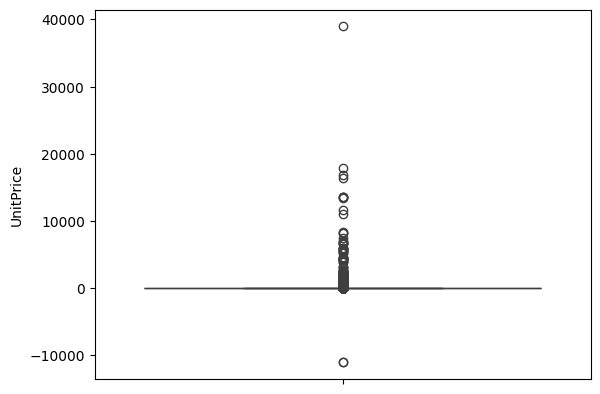

In [26]:
#Check Unit Price `s Distribution
sns.boxplot(y = 'UnitPrice', data=df)

It seems that there are values in UnitPrice column which are under 0

In [27]:
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Day,Month,Year
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,17841.0,United Kingdom,Fri,12,8,2011
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,17841.0,United Kingdom,Fri,12,8,2011


These are debt which are not required, so we remove them. There are some invoices which are debt, which we don't need in our analysis, these invoices are associated with description having word "debt".

In [28]:
df[df['Description'].str.contains('debt', case=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Day,Month,Year
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,17841.0,United Kingdom,Fri,12,8,2011
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,17841.0,United Kingdom,Fri,12,8,2011
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,17841.0,United Kingdom,Fri,12,8,2011


In [29]:
# removing thses rows
df = df[df['UnitPrice']>0] 

In [30]:
#check the minimum
df['UnitPrice'].min()

0.001

Thus all the -ve values are removed

### Box Plot of Quantity

<Axes: ylabel='Quantity'>

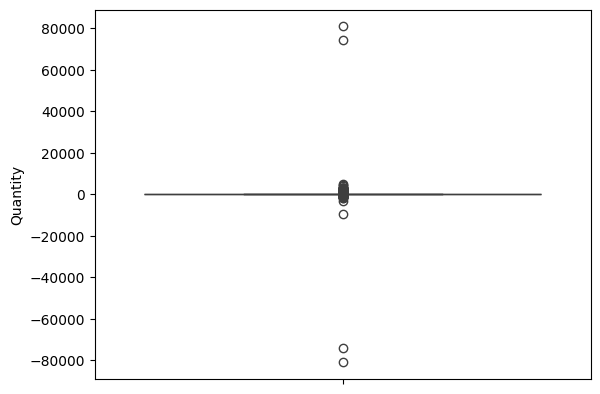

In [31]:
sns.boxplot(y='Quantity', data=df)

This means that there are values in column Quantity which are under 0, which happens when there is a cancelled purchase

In [32]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Day,Month,Year
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,Wed,1,12,2010
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,Wed,1,12,2010
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,Wed,1,12,2010
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,Wed,1,12,2010
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,Wed,1,12,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,Fri,9,12,2011
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,Fri,9,12,2011
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,Fri,9,12,2011
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,Fri,9,12,2011


In [33]:
cancelled_purchases = df[df['Quantity'] < 0]

In [34]:
#dataframe modified to contain only purchased product
df = df[df['Quantity']>0]

In [35]:
df['Quantity'].min() 
# check min to confirm for positive quantity

1

## Creating the Derived Column for Total Price
after removing the negative values from unitprice and quantity

In [36]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [37]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Day,Month,Year,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wed,1,12,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wed,1,12,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wed,1,12,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wed,1,12,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wed,1,12,2010,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Fri,9,12,2011,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Fri,9,12,2011,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Fri,9,12,2011,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Fri,9,12,2011,16.60


#### Box Plot of TotalPrice

<Axes: ylabel='TotalPrice'>

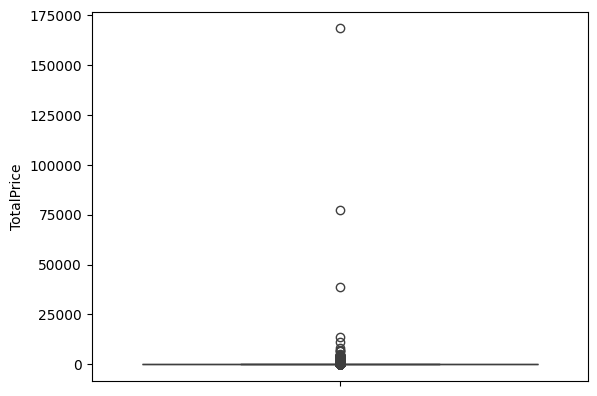

In [38]:
sns.boxplot(y='TotalPrice', data=df)

In [39]:
df['TotalPrice'].min() 

0.001

This means that there are no negative values in the column TotalPrice

### Analysing Year,Month,Day Feature

In [40]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Day,Month,Year,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wed,1,12,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wed,1,12,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wed,1,12,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wed,1,12,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wed,1,12,2010,20.34


<Axes: xlabel='Year', ylabel='count'>

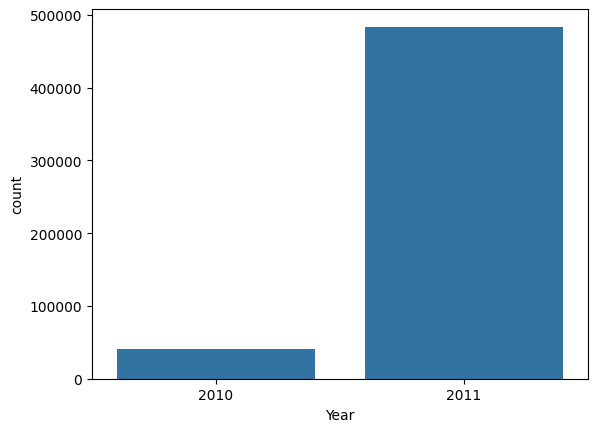

In [41]:
sns.countplot(df,x='Year')

<Axes: xlabel='Month', ylabel='count'>

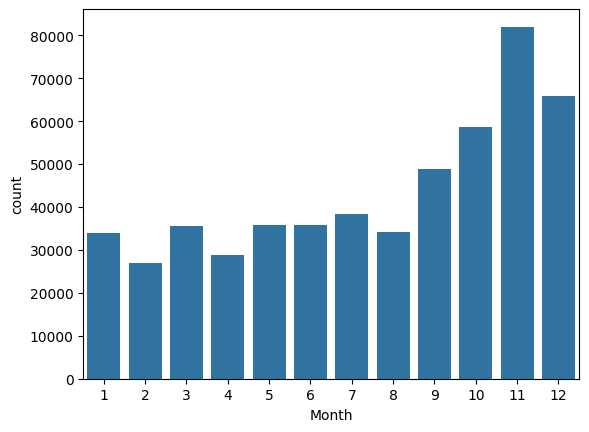

In [42]:
sns.countplot(df,x='Month')

<Axes: xlabel='WeekDay', ylabel='count'>

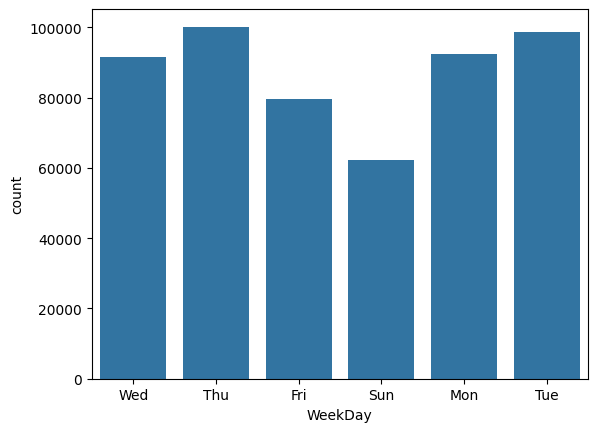

In [43]:
sns.countplot(df,x='WeekDay')

# Best month for Sales

The best month for sales was 2011.0-11.000000 with total sales of 1503866.78.


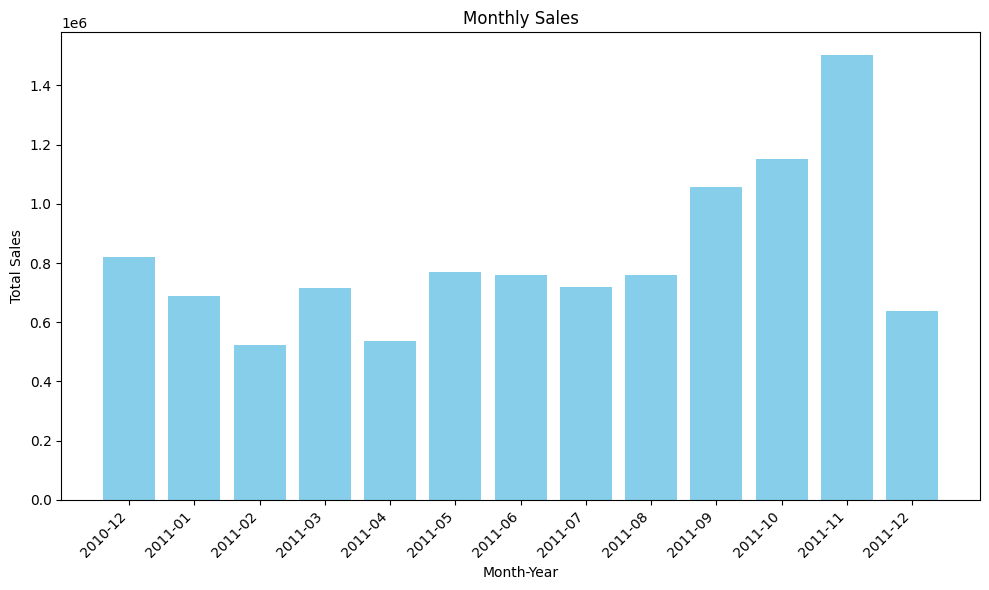

In [44]:
# Group by Year and Month to calculate total sales per month
monthly_sales = df.groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()

# Find the best month for sales
best_month = monthly_sales.loc[monthly_sales['TotalPrice'].idxmax()]

# Print the best month and sales
print(f"The best month for sales was {best_month['Year']}-{best_month['Month']:02f} with total sales of {best_month['TotalPrice']:.2f}.")

# Plotting the monthly sales
monthly_sales['Month-Year'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str).str.zfill(2)
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales['Month-Year'], monthly_sales['TotalPrice'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Monthly Sales')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

Based on the analysis, it was found that the month with the highest total sales in 2011 was November, followed by October and September, while April and February had the least total sales. As for the year 2010, data was only available for December.

## What time should we display advertisements to maximize likelihood of customer's buying product?

In [45]:
# Extract the hour from the InvoiceDate
df['Hour'] = df['InvoiceDate'].dt.hour

In [46]:
# Group by hour and sum the sales
hourly_sales = df.groupby('Hour')['TotalPrice'].sum().reset_index()

In [47]:
# Find the hour with the maximum sales
peak_hour = hourly_sales.loc[hourly_sales['TotalPrice'].idxmax()]

# Print the peak buying hour
print(f"The peak buying hour is {peak_hour['Hour']} with total sales of {peak_hour['TotalPrice']:.2f}.")

The peak buying hour is 10.0 with total sales of 1444814.77.


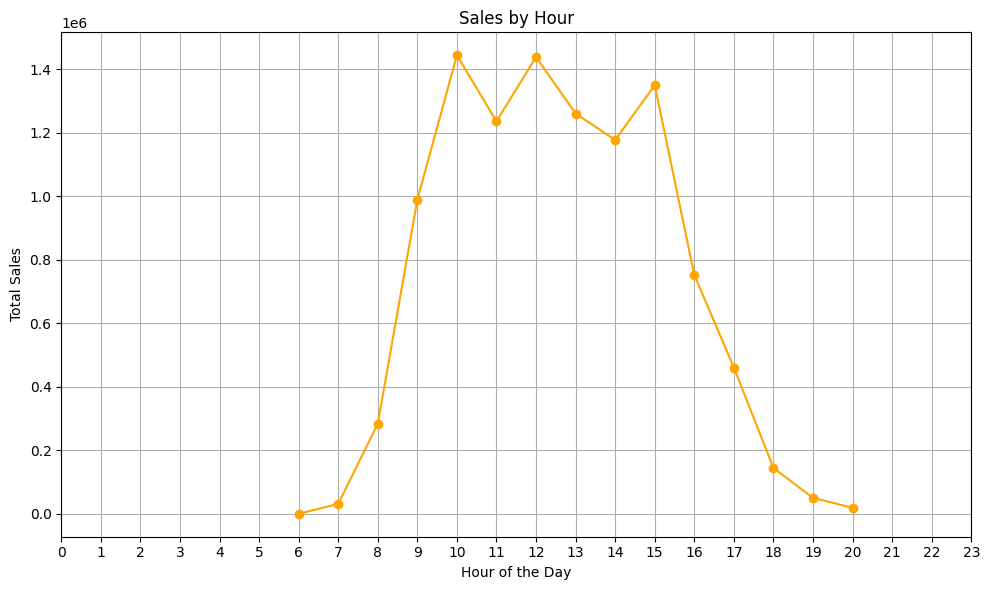

In [48]:
# Plotting sales by hour
plt.figure(figsize=(10, 6))
plt.plot(hourly_sales['Hour'], hourly_sales['TotalPrice'], marker='o', color='orange')
plt.title('Sales by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.xticks(range(0, 24))
plt.grid()
plt.tight_layout()
plt.show()

The plot shows how sales are distributed across different hours of the day.

The peak hour indicates when customers are most active in making purchases.

Advertisements should be displayed around this time to maximize the likelihood of a purchase.

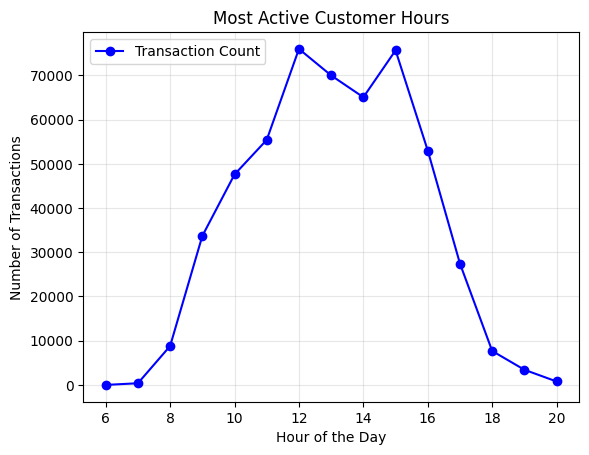

In [49]:
# Create a new column for hours, fetched from InvoiceDate field
df['Hour'] = df['InvoiceDate'].dt.hour

# Group by hour and count the number of transactions
most_active_hours = df.groupby('Hour').count()['InvoiceNo'].reset_index()

# Plot the transaction count by hour
plt.plot(most_active_hours['Hour'], most_active_hours['InvoiceNo'], marker='o', color='blue', label='Transaction Count')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.title('Most Active Customer Hours')
plt.grid(alpha=0.3)
plt.legend()
plt.show()


According to the data, the ideal time for this e-commerce company to run ads is between 12PM and 3PM as this time period yields the highest sales. It is possible that this is because customers are more likely to be available during their break times and are more likely to use their mobile devices or computers during these hours.

## What Products are most often sold together

In [50]:
from itertools import combinations
from collections import Counter

# Filter invoices with more than one product
multi_item_invoices = df[df['InvoiceNo'].duplicated(keep=False)]

multi_item_invoices

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Day,Month,Year,TotalPrice,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wed,1,12,2010,15.30,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wed,1,12,2010,20.34,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wed,1,12,2010,22.00,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wed,1,12,2010,20.34,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wed,1,12,2010,20.34,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Fri,9,12,2011,10.20,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Fri,9,12,2011,12.60,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Fri,9,12,2011,16.60,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Fri,9,12,2011,16.60,12


In [51]:
# Group products by invoice
grouped_products = multi_item_invoices.groupby('InvoiceNo')['Description'].apply(list)

grouped_products

InvoiceNo
536365    [WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...
536366    [HAND WARMER UNION JACK, HAND WARMER RED POLKA...
536367    [ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO...
536368    [JAM MAKING SET WITH JARS, RED COAT RACK PARIS...
536370    [ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...
                                ...                        
581583    [LUNCH BAG RED RETROSPOT, 6 CHOCOLATE LOVE HEA...
581584    [RED FLOCK LOVE HEART PHOTO FRAME, 6 CHOCOLATE...
581585    [BLACK TEA TOWEL CLASSIC DESIGN, ASSORTED BOTT...
581586    [LARGE CAKE STAND  HANGING STRAWBERY, SET OF 3...
581587    [CIRCUS PARADE LUNCH BOX , PLASTERS IN TIN CIR...
Name: Description, Length: 18332, dtype: object

In [52]:
# Generate all combinations of products sold together
product_combinations = grouped_products.apply(lambda products: list(combinations(products, 2)))

product_combinations

InvoiceNo
536365    [(WHITE HANGING HEART T-LIGHT HOLDER, WHITE ME...
536366    [(HAND WARMER UNION JACK, HAND WARMER RED POLK...
536367    [(ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYH...
536368    [(JAM MAKING SET WITH JARS, RED COAT RACK PARI...
536370    [(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKEL...
                                ...                        
581583    [(LUNCH BAG RED RETROSPOT, 6 CHOCOLATE LOVE HE...
581584    [(RED FLOCK LOVE HEART PHOTO FRAME, 6 CHOCOLAT...
581585    [(BLACK TEA TOWEL CLASSIC DESIGN, ASSORTED BOT...
581586    [(LARGE CAKE STAND  HANGING STRAWBERY, SET OF ...
581587    [(CIRCUS PARADE LUNCH BOX , PLASTERS IN TIN CI...
Name: Description, Length: 18332, dtype: object

Top 10 most often sold together products:
('JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT'): 541 times
('GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '): 485 times
('JUMBO SHOPPER VINTAGE RED PAISLEY', 'JUMBO BAG RED RETROSPOT'): 465 times
('JUMBO BAG RED RETROSPOT', 'DOTCOM POSTAGE'): 461 times
('JUMBO STORAGE BAG SUKI', 'JUMBO BAG RED RETROSPOT'): 453 times
('LUNCH BAG RED RETROSPOT', 'LUNCH BAG  BLACK SKULL.'): 427 times
('GREEN REGENCY TEACUP AND SAUCER', 'PINK REGENCY TEACUP AND SAUCER'): 396 times
('JUMBO BAG RED RETROSPOT', 'JUMBO  BAG BAROQUE BLACK WHITE'): 393 times
('JUMBO BAG APPLES', 'JUMBO BAG RED RETROSPOT'): 389 times
('WOODLAND CHARLOTTE BAG', 'RED RETROSPOT CHARLOTTE BAG'): 379 times


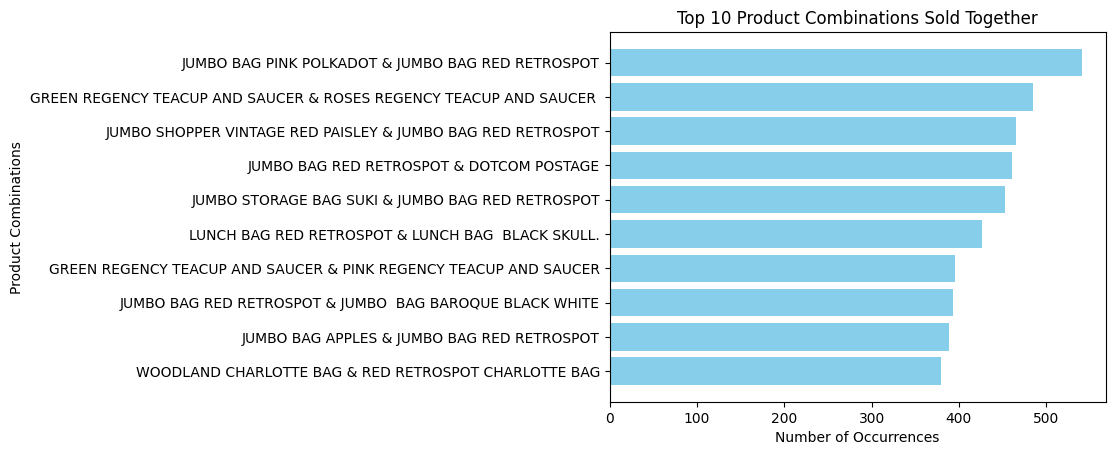

In [53]:
# Flatten the list of combinations
all_combinations = [combo for combos in product_combinations for combo in combos]

# Count the occurrences of each combination
combination_counts = Counter(all_combinations)

# Display the most common combinations
most_common_combinations = combination_counts.most_common(10)
print("Top 10 most often sold together products:")
for combo, count in most_common_combinations:
    print(f"{combo}: {count} times")


# Plot the most common combinations
combos, counts = zip(*most_common_combinations)
combo_labels = [' & '.join(combo) for combo in combos]
plt.barh(combo_labels, counts, color='skyblue')
plt.xlabel('Number of Occurrences')
plt.ylabel('Product Combinations')
plt.title('Top 10 Product Combinations Sold Together')
plt.gca().invert_yaxis()
plt.show()

JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT
is sold together the most

## Products which are sold the most

In [54]:
# Grouping the data by product description and summing up the quantity sold
most_sold_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

# Display the top-selling product
top_selling_product = most_sold_products.head(1)
print("The product that sold the most:")
print(top_selling_product)

The product that sold the most:
Description
PAPER CRAFT , LITTLE BIRDIE    80995
Name: Quantity, dtype: int64


In [55]:
# seeing top 10 top selling products
top_10_products = most_sold_products.head(10)

top_10_products

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54951
JUMBO BAG RED RETROSPOT               48371
WHITE HANGING HEART T-LIGHT HOLDER    37872
POPCORN HOLDER                        36749
PACK OF 72 RETROSPOT CAKE CASES       36396
ASSORTED COLOUR BIRD ORNAMENT         36362
RABBIT NIGHT LIGHT                    30739
MINI PAINT SET VINTAGE                26633
Name: Quantity, dtype: int64

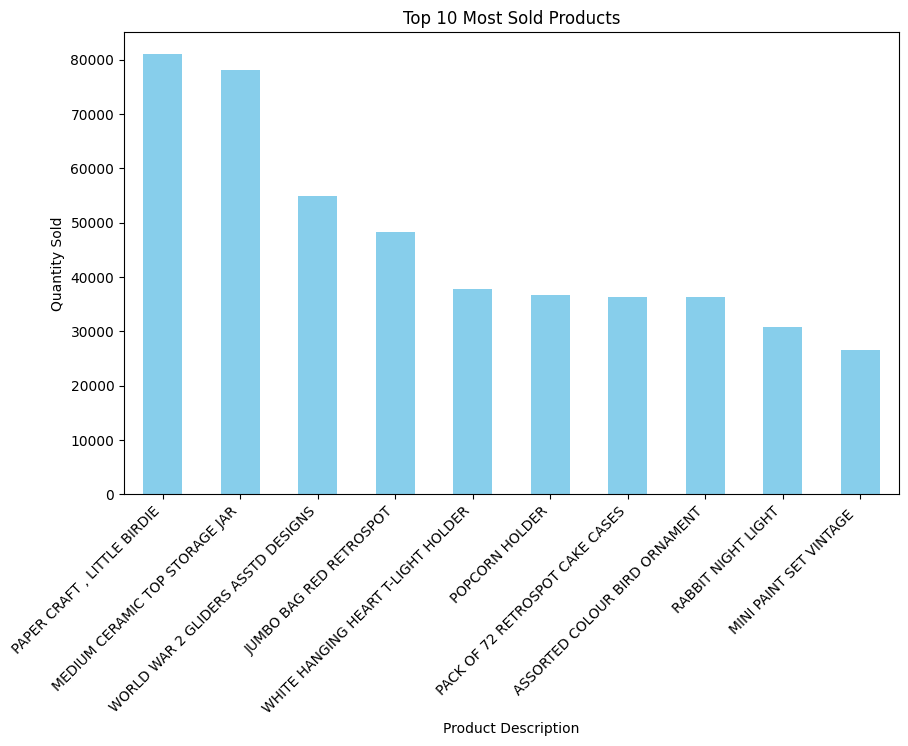

In [56]:
# Plotting the top 10 products

plt.figure(figsize=(10, 6))
top_10_products.plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Sold Products")
plt.xlabel("Product Description")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45, ha='right')
plt.show()


Analysis : We can see that these items are sold the most from the company's website, out of them Paper Craft are sold most with approx 81k quantity

## Which countries have more customers?

In [57]:
# Count the unique number of customers per country
customers_per_country = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)

# Display the countries with the most customers
print("Top 10 countries with the most customers:")
print(customers_per_country.head(10))


Top 10 countries with the most customers:
Country
United Kingdom    3920
Germany             94
France              88
Spain               30
Belgium             25
Switzerland         22
Portugal            20
Italy               14
Finland             12
Austria             11
Name: CustomerID, dtype: int64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10208\1570249719.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10_countries, x='Country', y='CustomerCount', palette='viridis')


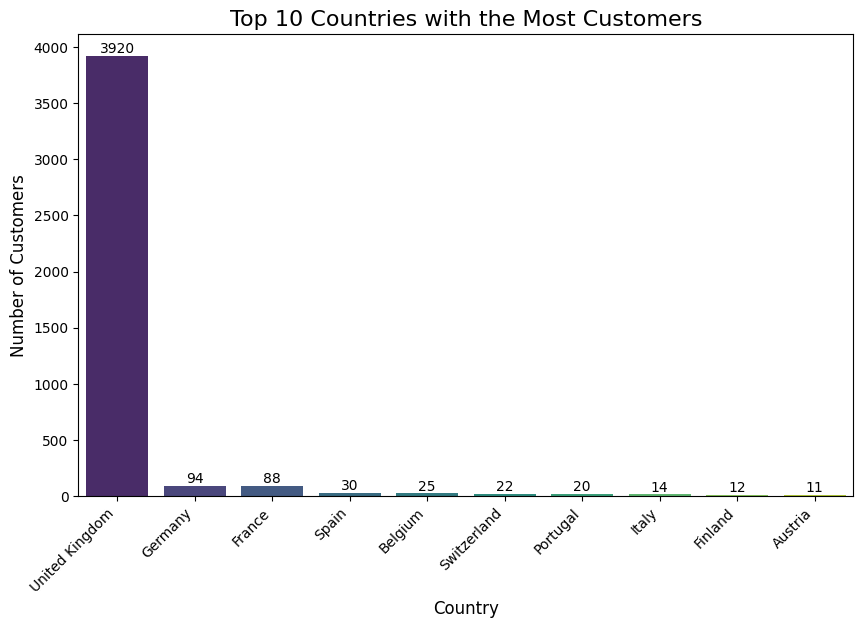

In [58]:
# Count the unique number of customers per country
customers_per_country = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)

# Convert to DataFrame for Seaborn compatibility
top_10_countries = customers_per_country.head(10).reset_index()
top_10_countries.columns = ['Country', 'CustomerCount']  # Rename for clarity

# Plot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_10_countries, x='Country', y='CustomerCount', palette='viridis')
for container in ax.containers:  # Loop through all containers
    ax.bar_label(container, fmt="%.0f", label_type='edge')
plt.title("Top 10 Countries with the Most Customers", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(rotation=45, ha='right')
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [59]:
# using matplotlib
# Plot the top 10 countries

# top_10_countries = customers_per_country.head(10)

# plt.figure(figsize=(10, 6))
# top_10_countries.plot(kind='bar', color='lightgreen')
# plt.title("Top 10 Countries with the Most Customers")
# plt.xlabel("Country")
# plt.ylabel("Number of Customers")
# plt.xticks(rotation=45, ha='right')
# plt.show()


Thus it can be seen that United Kingdom has the most number of customers

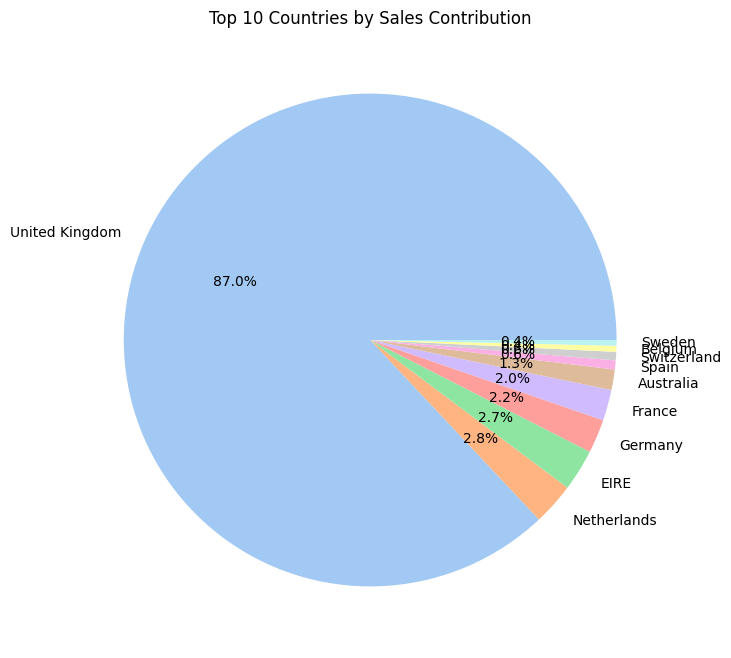

In [60]:
# Regional Analysis
# Group by 'Country' and calculate total sales
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

# Plot the top 10 countries in a pie chart
country_sales.head(10).plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colors=sns.color_palette('pastel'))
plt.title('Top 10 Countries by Sales Contribution')
plt.ylabel('')  
plt.show()

### Total sales per country

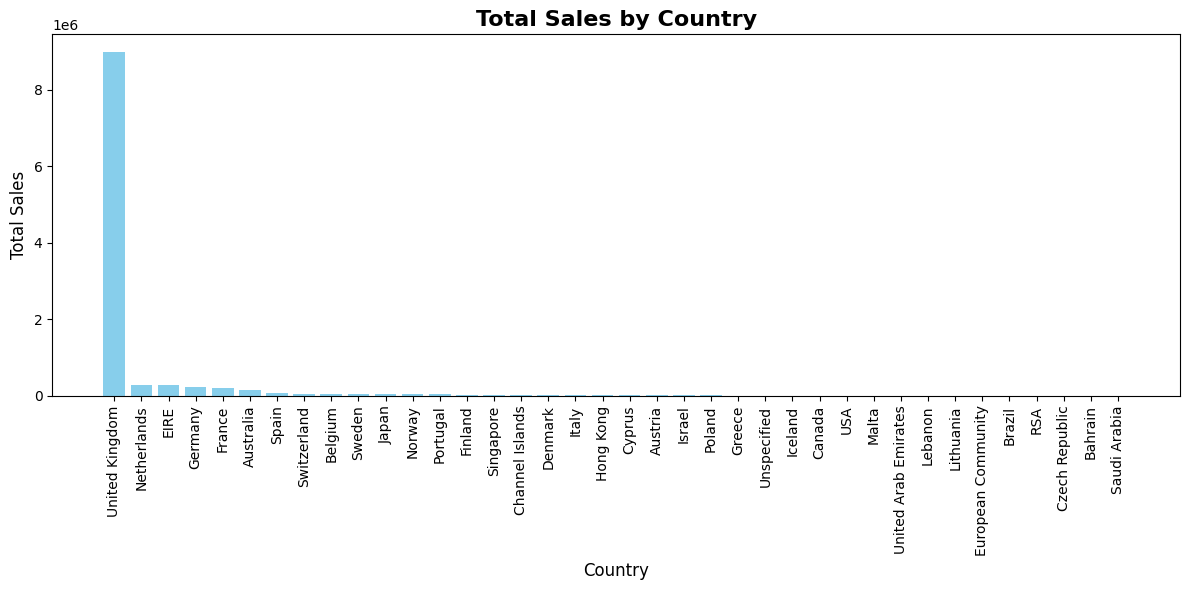

In [61]:
# Group by country to calculate total sales per country
country_sales = df.groupby('Country')['TotalPrice'].sum().reset_index()

# Sort countries by sales for better visualization
country_sales = country_sales.sort_values(by='TotalPrice', ascending=False)

# Plot histogram
plt.figure(figsize=(12, 6))
plt.bar(country_sales['Country'], country_sales['TotalPrice'], color='skyblue')
plt.title('Total Sales by Country', fontsize=16, fontweight="bold")
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Country-wise Sales Count

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10208\1470640828.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette="magma")


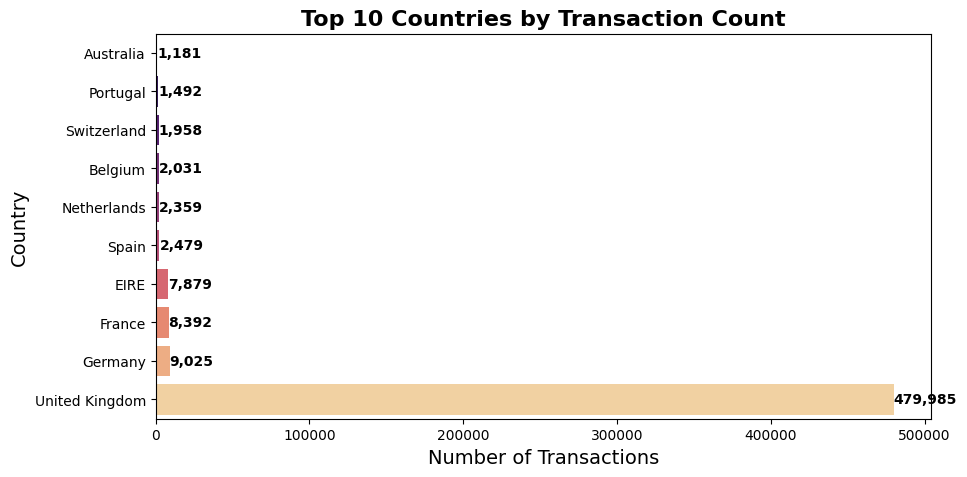

In [62]:
# Country-wise Sales Count (Top 10 Countries)
plt.figure(figsize=(10, 5))
top_countries = df['Country'].value_counts().nlargest(10).sort_values(ascending=True)

# Horizontal bar plot for better readability
sns.barplot(y=top_countries.index, x=top_countries.values, palette="magma")

# Add title and labels
plt.title("Top 10 Countries by Transaction Count", fontsize=16, fontweight='bold')
plt.xlabel("Number of Transactions", fontsize=14)
plt.ylabel("Country", fontsize=14)

# Add value labels to each bar
for index, value in enumerate(top_countries.values):
    plt.text(value, index, f"{value:,}", va='center', ha='left', fontweight='bold')

plt.show()


## which day has more number of sales?

In [63]:
# Group by WeekDay and count the transactions
sales_per_day = df['WeekDay'].value_counts().reset_index()
sales_per_day.columns = ['Day', 'Sales']

sales_per_day

,Day,Sales
0,Thu,100213
1,Tue,98726
2,Mon,92466
3,Wed,91467
4,Fri,79667
5,Sun,62339


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10208\4179431363.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Day', y='Sales', data=sales_per_day, palette='viridis')


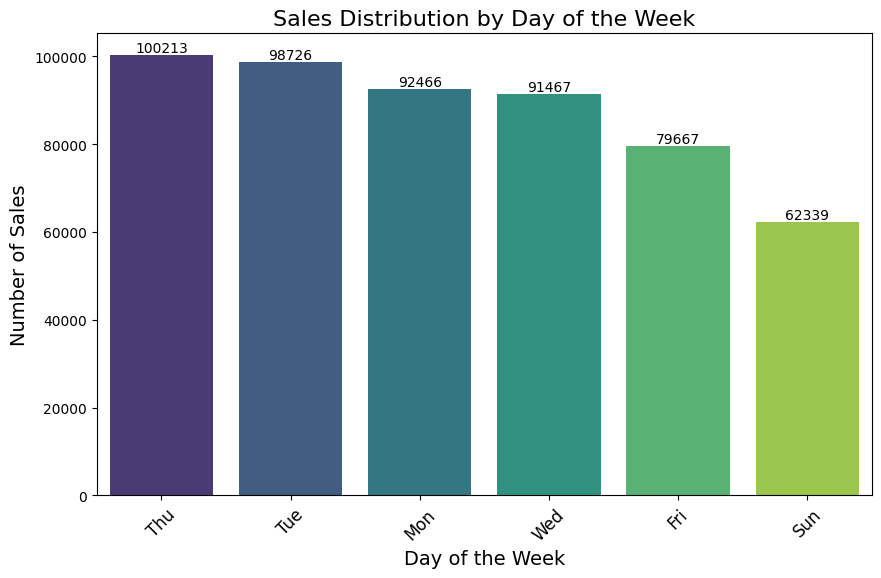

In [64]:
# Plot the sales per day
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Day', y='Sales', data=sales_per_day, palette='viridis')

# Adding labels to each bar
for container in ax.containers:  # Loop through all containers
    ax.bar_label(container, fmt="%.0f", label_type='edge')  # Display height values

plt.title('Sales Distribution by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Sales', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()

Thus Thursday has the most sales

## Correlation Matrix

In [65]:
list_cols=list(df.columns)
numerical_cols=[]
for i in list_cols:
    if df[i].dtype!='object':
        numerical_cols.append(i)

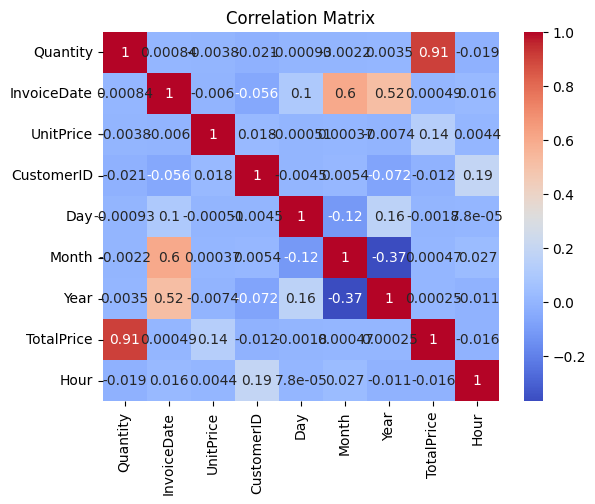

In [66]:
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Categorical Segmentation
#### Categorize products into price ranges

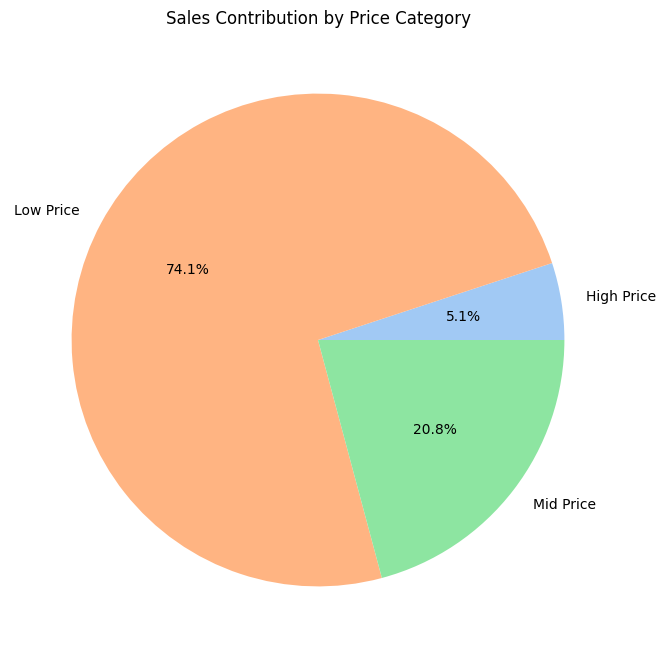

In [67]:
def categorize_price(price):
    if price < 5:
        return 'Low Price'
    elif 5 <= price <= 20:
        return 'Mid Price'
    else:
        return 'High Price'

df['PriceCategory'] = df['UnitPrice'].apply(categorize_price)

# Group by new category
price_category_sales = df.groupby('PriceCategory')['TotalPrice'].sum()

# Plot the price category sales in a pie chart
price_category_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colors=sns.color_palette('pastel'))
plt.title('Sales Contribution by Price Category')
plt.ylabel('')
plt.show()

Inference:

People are more tend to buy product of lower price.

### Analysing Customer ID Feature

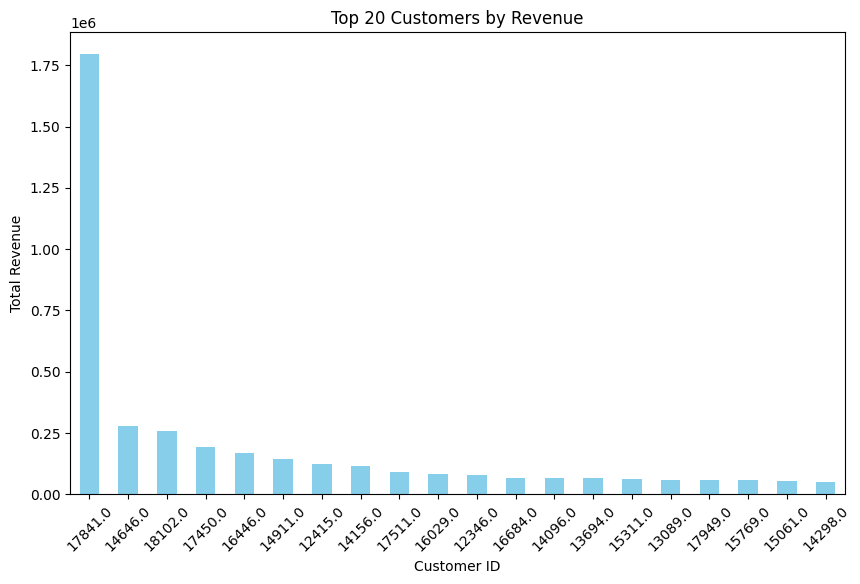

In [68]:
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(20)
top_customers.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 20 Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

CustmerID 17841.0 has placed most number of orders and thus can be said to earn the most

# univariate Analysis


# bivariate Analysis

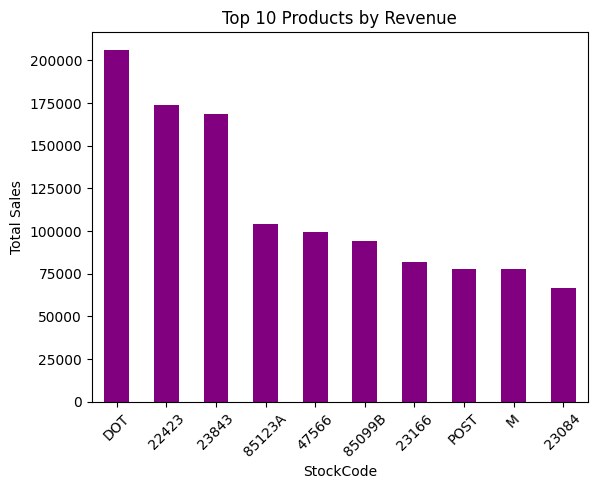

In [69]:
product_sales = df.groupby('StockCode')['TotalPrice'].sum().sort_values(ascending=False)

product_sales.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Products by Revenue')
plt.xlabel('StockCode')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

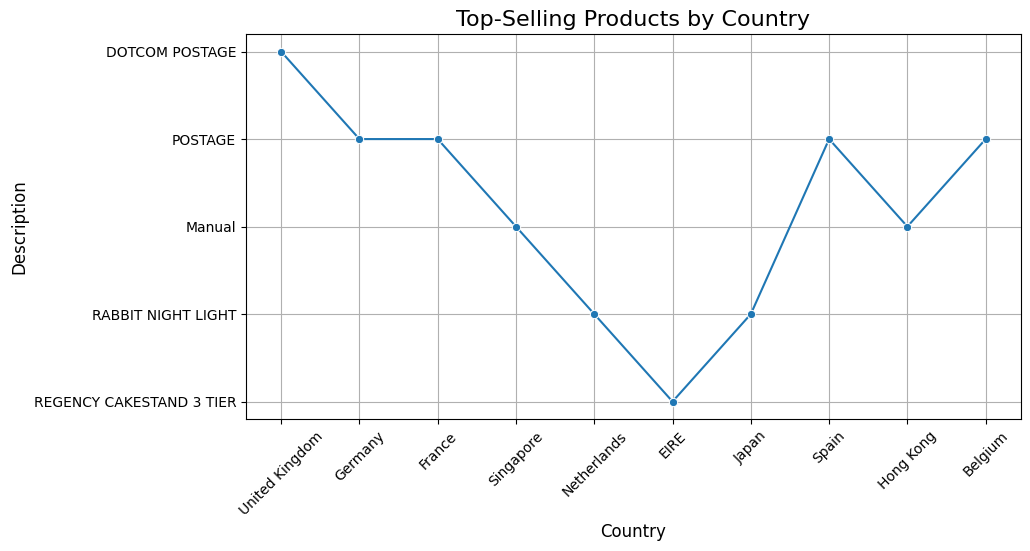

In [70]:
# Identify the top-selling product in each country
top_selling_products = (
    df.groupby(['Country', 'Description'])
    .agg({'TotalPrice': 'sum'})
    .reset_index()
    .sort_values(['Country', 'TotalPrice'], ascending=[True, False])
    .drop_duplicates(subset=['Country'], keep='first')
)

# Sort data for better visualization
top_selling_products_sort = top_selling_products.sort_values(by='TotalPrice', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.lineplot(
    data=top_selling_products_sort,
    x='Country',        
    y='Description', 
    marker='o'       
)

plt.title('Top-Selling Products by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Description', fontsize=12)
plt.xticks(rotation=45) 
plt.grid()
plt.show()


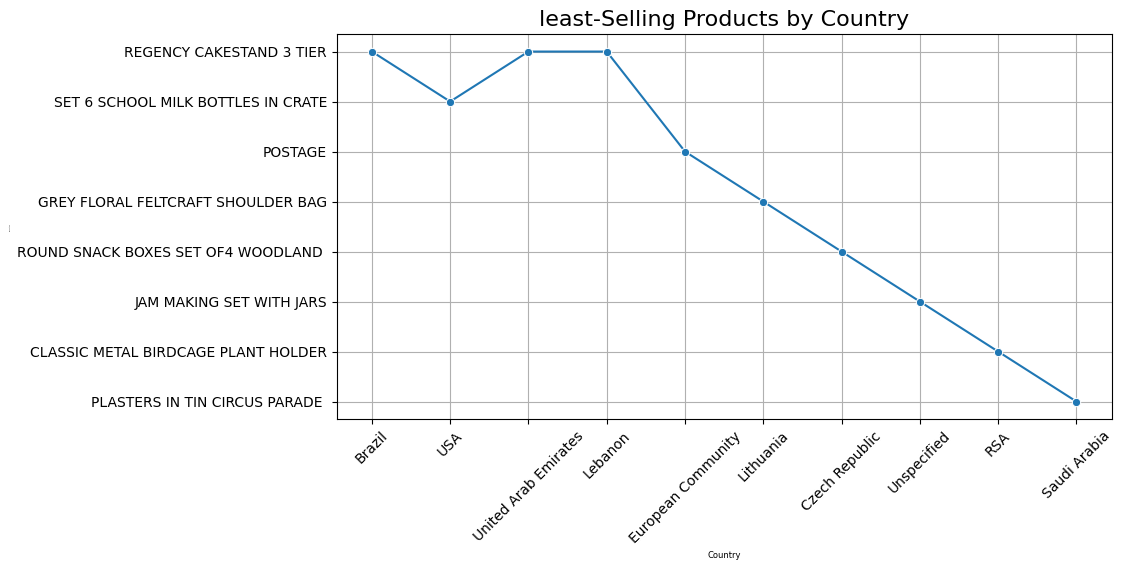

In [71]:
least_selling_products_sort = top_selling_products.sort_values(by='TotalPrice', ascending=False).tail(10)
# Create a line plot with descriptions
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=least_selling_products_sort,
    x='Country',        
    y='Description', 
    marker='o'       
)

plt.title('least-Selling Products by Country', fontsize=16)
plt.xlabel('Country', fontsize=6)
plt.ylabel('Description', fontsize=1)
plt.xticks(rotation=45) 

# Show plot
plt.grid()
plt.show()

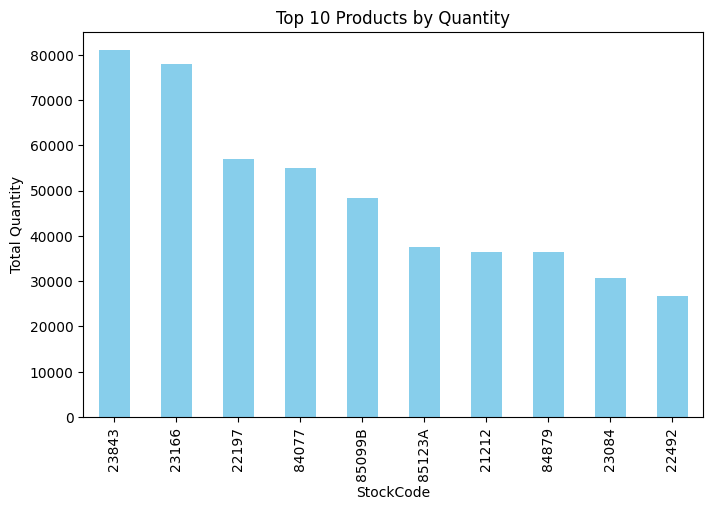

In [72]:
# Top 10 Products by Quantity
top_products = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
top_products.plot(kind='bar', color='skyblue')
plt.title("Top 10 Products by Quantity")
plt.xlabel("StockCode")
plt.ylabel("Total Quantity")
plt.show()

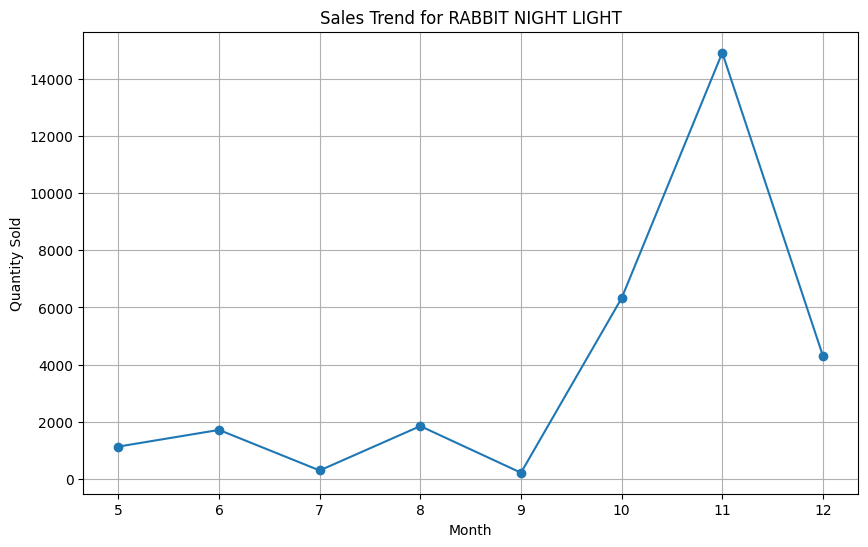

In [73]:
# Group by product and month, summing quantities sold
monthly_sales = df.groupby(['Month', 'Description'])['Quantity'].sum().reset_index()

# --- Line Plot for a Specific Product ---
product = "RABBIT NIGHT LIGHT"  # Replace with your product of interest
product_sales = monthly_sales[monthly_sales['Description'] == product]

plt.figure(figsize=(10, 6))
plt.plot(product_sales['Month'].astype(str), product_sales['Quantity'], marker='o')
plt.title(f'Sales Trend for {product}')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.grid()
plt.show()

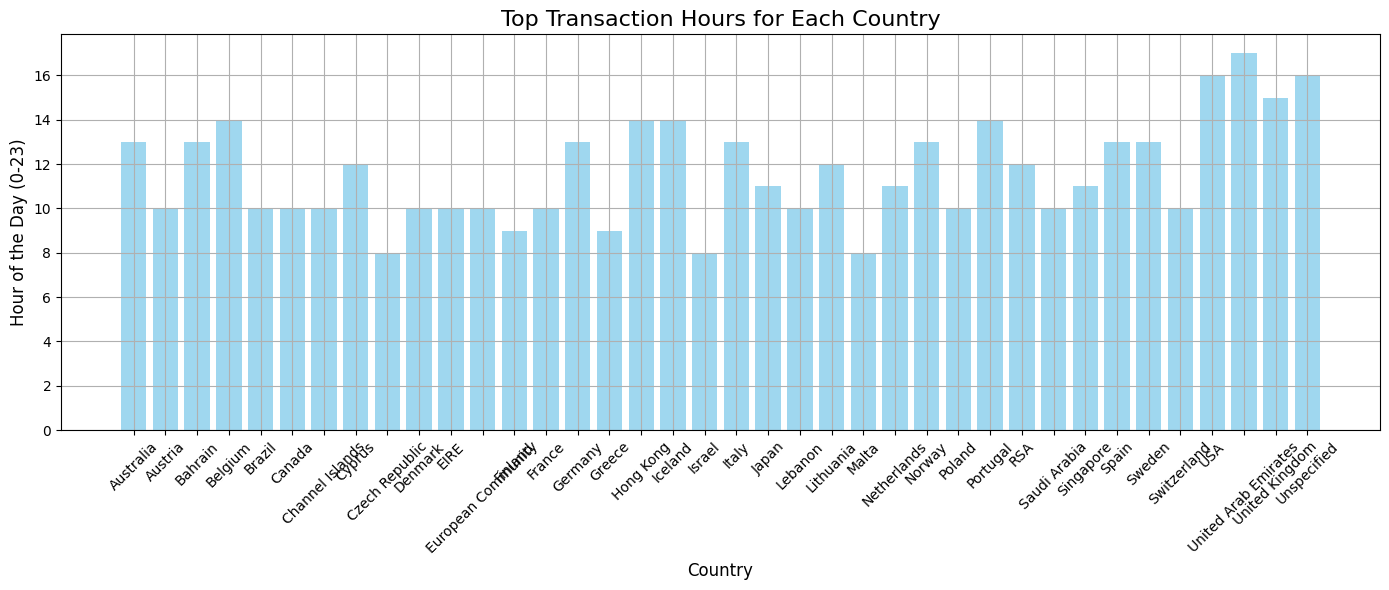

In [74]:
# Extract the hour from the InvoiceDate
df['Hour'] = df['InvoiceDate'].dt.hour
# Group by Country and Hour to count transactions
hourly_transactions = df.groupby(['Country', 'Hour']).size().reset_index(name='TransactionCount')

# Find the hour with the highest transaction count for each country
top_hours = hourly_transactions.loc[hourly_transactions.groupby('Country')['TransactionCount'].idxmax()]

# Plotting the top transaction hours for each country
plt.figure(figsize=(14, 6))
plt.bar(top_hours['Country'], top_hours['Hour'], color='skyblue', alpha=0.8)

# Add titles and labels
plt.title('Top Transaction Hours for Each Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Hour of the Day (0-23)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
# Show the plot
plt.show()

# RFM Analysis

In [75]:
import datetime as dt


# Define a reference date for analysis, the most recent date is taken
reference_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

reference_date

Timestamp('2011-12-10 12:50:00')

In [76]:
# Groupin by CustomerID
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'TotalPrice': 'sum'    # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,310,17,334.40
...,...,...,...,...
4333,18280.0,278,10,180.60
4334,18281.0,181,7,80.82
4335,18282.0,8,12,178.05
4336,18283.0,4,721,2045.53


In [77]:
# ## finding RFM Features without using aggregate funtion
# # Calculate Monetary (total spending per customer)
# monetary = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
# monetary.columns = ['CustomerID', 'Monetary']

# # Calculate Frequency (number of transactions per customer)
# frequency = df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
# frequency.columns = ['CustomerID', 'Frequency']

# # Merge the two DataFrames on 'CustomerID'
# rfm = pd.merge(monetary, frequency, on='CustomerID',how='inner')

# recent_date = max(df['InvoiceDate'])
# df['Difference'] = (recent_date - df['InvoiceDate']).dt.days
# recency = df.groupby('CustomerID')['Difference'].min()
# recency = recency.reset_index()

# final_rfm = pd.merge(rfm,recency,on='CustomerID',how='inner')
# final_rfm.columns = ['CustomerID','monetary','Frequency','Recency']

# final_rfm

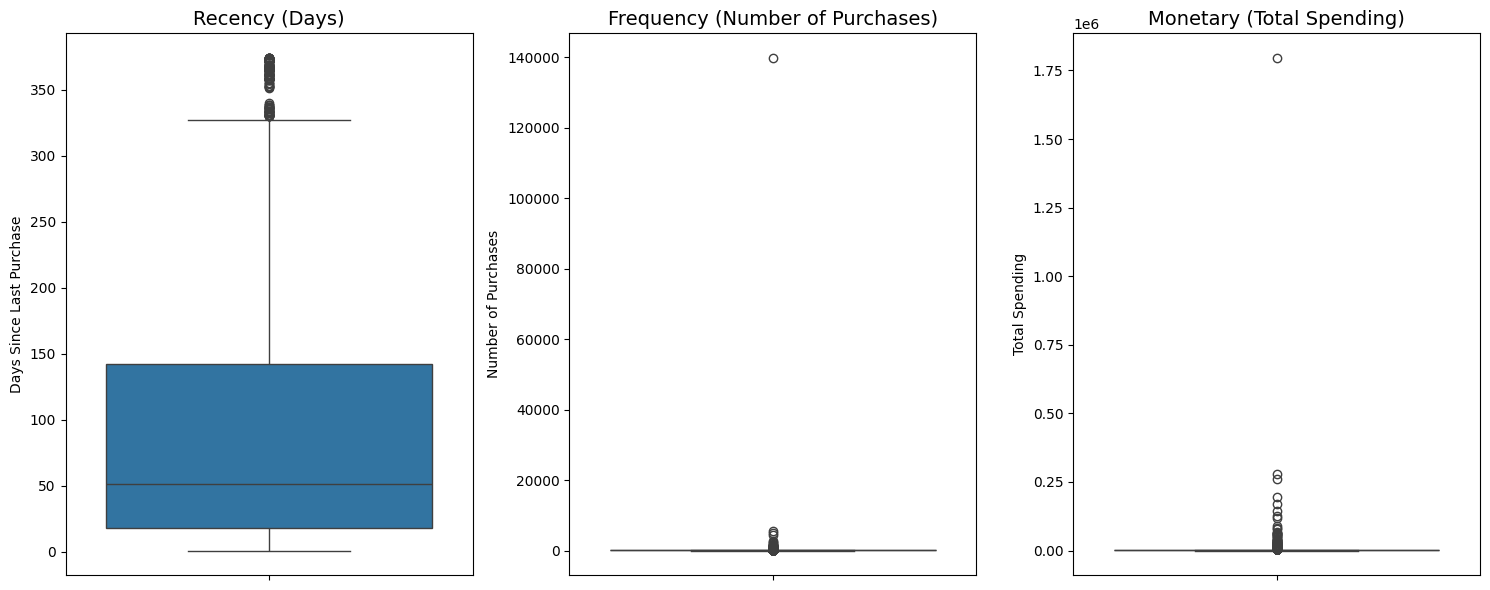

In [78]:
plt.figure(figsize=(15, 6))

# Recency Subplot
plt.subplot(1, 3, 1)
sns.boxplot(y=rfm['Recency'])
plt.title('Recency (Days)', fontsize=14)
plt.ylabel('Days Since Last Purchase')
plt.xlabel('')

# Frequency Subplot
plt.subplot(1, 3, 2)
sns.boxplot(y=rfm['Frequency'])
plt.title('Frequency (Number of Purchases)', fontsize=14)
plt.ylabel('Number of Purchases')
plt.xlabel('')

# Monetary Subplot
plt.subplot(1, 3, 3)
sns.boxplot(y=rfm['Monetary'])
plt.title('Monetary (Total Spending)', fontsize=14)
plt.ylabel('Total Spending')
plt.xlabel('')

plt.tight_layout()
plt.show()

In [79]:
#Ignore 0 in Monatery so we will not need those customers in our analysis
rfm = rfm[rfm['Monetary']>0]

In [80]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000,4.338000e+03
mean,15300.408022,92.536192,120.995390,2.453230e+03
std,1721.808492,100.014379,2131.001845,2.866704e+04
min,12346.000000,1.000000,1.000000,3.750000e+00
25%,13813.250000,18.000000,17.000000,3.064825e+02
50%,15299.500000,51.000000,41.000000,6.685700e+02
75%,16778.750000,142.000000,98.000000,1.660597e+03
max,18287.000000,374.000000,139862.000000,1.795422e+06


In [81]:
# Define a function to cap outliers
def cap_outliers(df, column, lower_percentile=0.01, upper_percentile=0.99):
    lower_limit = df[column].quantile(lower_percentile)  # Lower percentile
    upper_limit = df[column].quantile(upper_percentile)  # Upper percentile
    
    # Cap values
    df[column] = df[column].clip(lower=lower_limit, upper=upper_limit)

# Apply capping for each RFM metric
rfm_capped = rfm.copy()
cap_outliers(rfm_capped, 'Recency')  # Cap Recency
cap_outliers(rfm_capped, 'Frequency')    # Cap Frequency
cap_outliers(rfm_capped, 'Monetary')   # Cap Monetary Value

rfm = rfm_capped

rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,92.500461,82.066325,1592.644234
std,1721.808492,99.914834,112.004605,2788.353651
min,12346.000000,1.000000,1.000000,52.200000
25%,13813.250000,18.000000,17.000000,306.482500
50%,15299.500000,51.000000,41.000000,668.570000
75%,16778.750000,142.000000,98.000000,1660.597500
max,18287.000000,369.000000,655.630000,19780.487800


In [82]:
# # Removinf Outliers using IRQ Method
# def remove_outliers(df, column):
#     Q1 = df[column].quantile(0.25)  # First quartile
#     Q3 = df[column].quantile(0.75)  # Third quartile
#     IQR = Q3 - Q1                   # Interquartile Range
#     lower_bound = Q1 - 1.5 * IQR    # Lower limit
#     upper_bound = Q3 + 1.5 * IQR    # Upper limit
    
#     # Keep only rows within bounds
#     return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# # Removing outliers from RFM
# rfm_cleaned = rfm.copy()  # Keep the original intact
# rfm_cleaned = remove_outliers(rfm_cleaned, 'Recency')  # For Recency
# rfm_cleaned = remove_outliers(rfm_cleaned, 'Frequency')    # For Frequency
# rfm_cleaned = remove_outliers(rfm_cleaned, 'Monetary')   # For Monetary Value

# # Check new dataset shape
# print("Original Dataset Shape:", rfm.shape)
# print("Cleaned Dataset Shape:", rfm_cleaned.shape)

# rfm = rfm_cleaned
# rfm

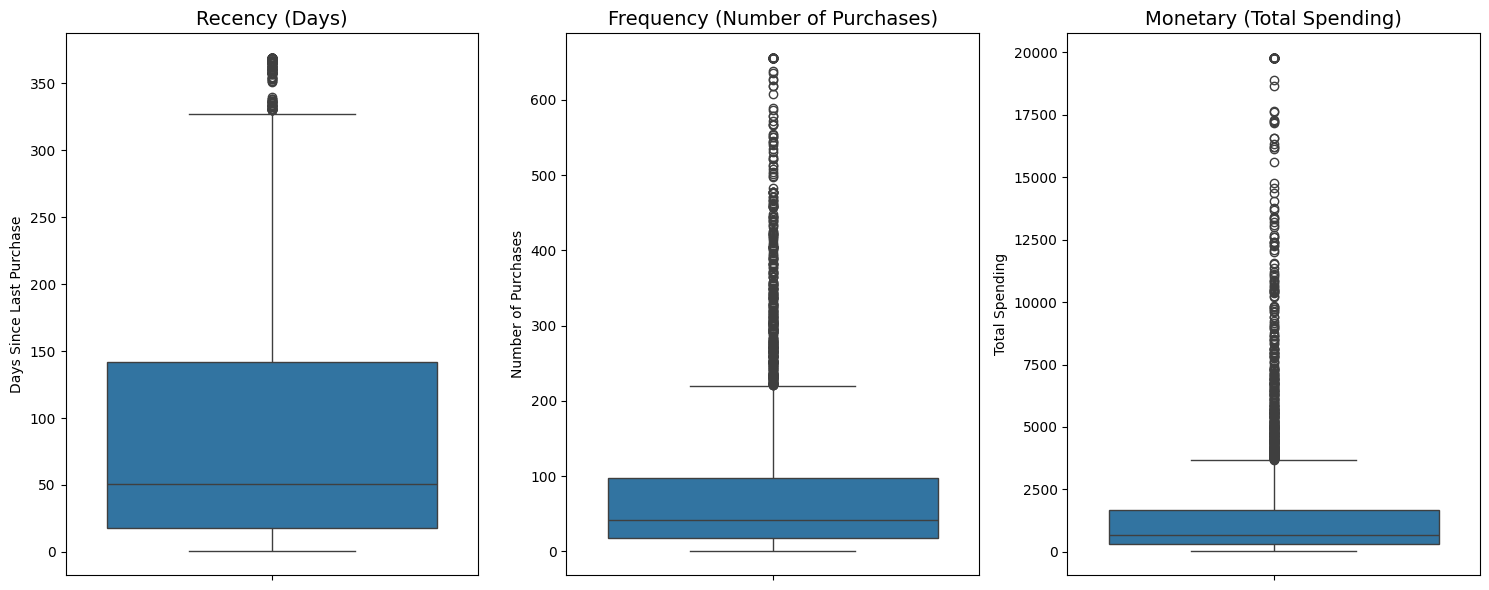

In [83]:
#plotting agian to see if outliers are capped of not
plt.figure(figsize=(15, 6))

# Recency Subplot
plt.subplot(1, 3, 1)
sns.boxplot(y=rfm['Recency'])
plt.title('Recency (Days)', fontsize=14)
plt.ylabel('Days Since Last Purchase')
plt.xlabel('')

# Frequency Subplot
plt.subplot(1, 3, 2)
sns.boxplot(y=rfm['Frequency'])
plt.title('Frequency (Number of Purchases)', fontsize=14)
plt.ylabel('Number of Purchases')
plt.xlabel('')

# Monetary Subplot
plt.subplot(1, 3, 3)
sns.boxplot(y=rfm['Monetary'])
plt.title('Monetary (Total Spending)', fontsize=14)
plt.ylabel('Total Spending')
plt.xlabel('')

plt.tight_layout()
plt.show()

In [84]:
# finding recency score
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])

In [85]:
#finding frequency score
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 5, labels=[1, 2, 3, 4, 5])

In [86]:
#finding monetary score
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [87]:
#Setting RFM Score
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

In [88]:
rfm

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,12346.0,326,1.00,19780.4878,1,1,5,115
1,12347.0,2,182.00,4310.0000,5,5,5,555
2,12348.0,75,31.00,1797.2400,2,3,4,234
3,12349.0,19,73.00,1757.5500,4,4,4,444
4,12350.0,310,17.00,334.4000,1,2,2,122
...,...,...,...,...,...,...,...,...
4333,18280.0,278,10.00,180.6000,1,1,1,111
4334,18281.0,181,7.00,80.8200,1,1,1,111
4335,18282.0,8,12.00,178.0500,5,1,1,511
4336,18283.0,4,655.63,2045.5300,5,5,4,554


#### Visualizing RFM Metrics

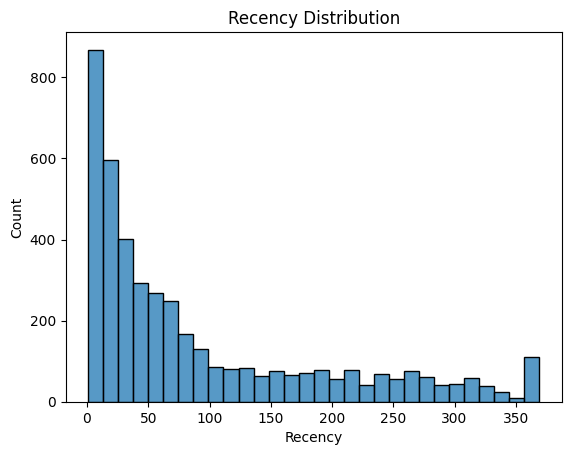

In [89]:
# recency Distribution
sns.histplot(data = rfm, x = 'Recency', bins = 30)
plt.title('Recency Distribution')
plt.show()

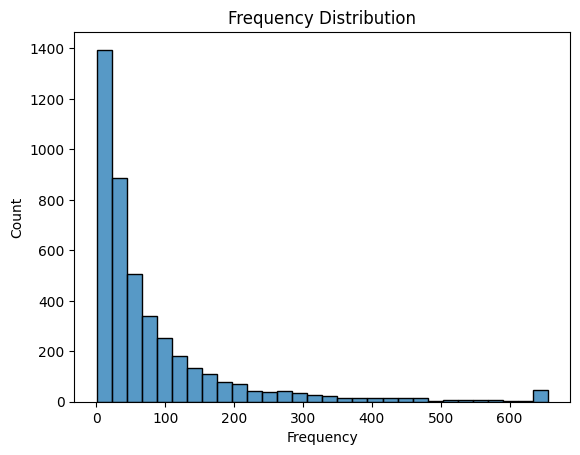

In [90]:
# Frequency Distribution
sns.histplot(data = rfm, x = 'Frequency', bins = 30)
plt.title('Frequency Distribution')
plt.show()

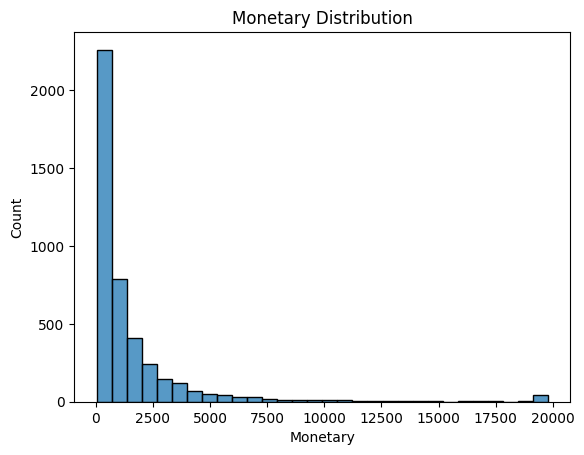

In [91]:
# Monetary Distribution
sns.histplot(data = rfm, x = 'Monetary', bins = 30)
plt.title('Monetary Distribution')
plt.show()

### Customer Segmentation Using RFM Analysis

Segmentation calculation: The calculation to know which segmentation the customer is in is given by averaging the F and R scores I see that Monetary could be deceptive , So i will segment our customers on Recency and Frequency Scores

these two metrics often capture the most critical behavioral patterns of customers

In [92]:
#defining customer segment categories
segment_map = {
    r'[1-2][1-2][1-5]' : 'Hibernating',
    r'[1-2][3-4][1-5]' : 'At-Risk',
    r'[1-2]5[1-5]' : "Can\'t Loose",
    r'3[1-2][1-5]' : 'About to Slip',
    r'33[1-5]' : 'Need Attention',
    r'[3-4][4-5][1-5]' : 'Loyal Customers',
    r'41[1-5]' : 'Promising',
    r'51[1-5]' : 'New Customers',
    r'[4-5][2-3][1-5]' : 'Potential Loyalists',
    r'5[4-5][1-5]' : 'Champions',
}

Customer Segments Description:
1. Hibernating: Customers who scored low on both Recency and Frequency (e.g., RF_Score in the range [11, 22]).
   These customers haven't purchased recently and historically buy infrequently. They are at high risk of churn.

2. At-Risk: Customers with low Recency and moderate Frequency scores (e.g., RF_Score in the range [13, 24]).
   They used to buy more frequently but have not been active recently. Consider re-engagement strategies.

3. Can't Lose: Customers with low Recency but the highest Frequency score (e.g., RF_Score in the range [15]).
   These are high-value customers who are starting to disengage. Immediate action is needed to retain them.

4. About to Slip: Customers with moderate Recency and low Frequency scores (e.g., RF_Score in the range [31, 32]).
   These customers are showing signs of reduced activity and may require encouragement to stay engaged.

5. Need Attention: Customers with moderate Recency and Frequency scores (e.g., RF_Score of 33).
   They are neither very active nor inactive but may require a little push to become more engaged.

6. Loyal Customers: Customers with moderate-to-high Recency and high Frequency scores (e.g., RF_Score in the range [34, 45]).
   These are regular customers who purchase often and are loyal to the business. Continue nurturing these relationships.

7. Promising: Customers with high Recency and low Frequency scores (e.g., RF_Score of 41).
   These customers have recently started engaging but haven't purchased frequently yet. Encourage them to buy more.

8. New Customers: Customers with the highest Recency score and low Frequency (e.g., RF_Score of 51).
   These are new customers who have made their first purchase. Focus on onboarding and building long-term loyalty.

9. Potential Loyalists: Customers with high Recency and moderate Frequency scores (e.g., RF_Score in the range [42, 53]).
   These customers have shown promise with recent and moderately frequent purchases. Convert them into loyal customers.

10. Champions: Customers with the highest Recency and Frequency scores (e.g., RF_Score in the range [54, 55]).
    These are your best customers who purchase frequently and recently. They are highly engaged and should be rewarded.


In [93]:
import re

# Assign segments
def assign_segment(score):
    for pattern, segment in segment_map.items():
        if re.match(pattern, score):
            return segment
    return 'Other'  # Default for unmatched patterns

rfm['Segment'] = rfm['RFM_Score'].apply(assign_segment)

In [94]:
rfm

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,12346.0,326,1.00,19780.4878,1,1,5,115,Hibernating
1,12347.0,2,182.00,4310.0000,5,5,5,555,Champions
2,12348.0,75,31.00,1797.2400,2,3,4,234,At-Risk
3,12349.0,19,73.00,1757.5500,4,4,4,444,Loyal Customers
4,12350.0,310,17.00,334.4000,1,2,2,122,Hibernating
...,...,...,...,...,...,...,...,...,...
4333,18280.0,278,10.00,180.6000,1,1,1,111,Hibernating
4334,18281.0,181,7.00,80.8200,1,1,1,111,Hibernating
4335,18282.0,8,12.00,178.0500,5,1,1,511,New Customers
4336,18283.0,4,655.63,2045.5300,5,5,4,554,Champions


Segment
Hibernating            1069
Loyal Customers         824
Champions               604
At-Risk                 560
Potential Loyalists     502
About to Slip           327
Need Attention          201
Promising               115
Can't Loose              79
New Customers            57
Name: count, dtype: int64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10208\3940166449.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b = sns.barplot(x=segment_summary.index, y=segment_summary.values, palette='viridis')


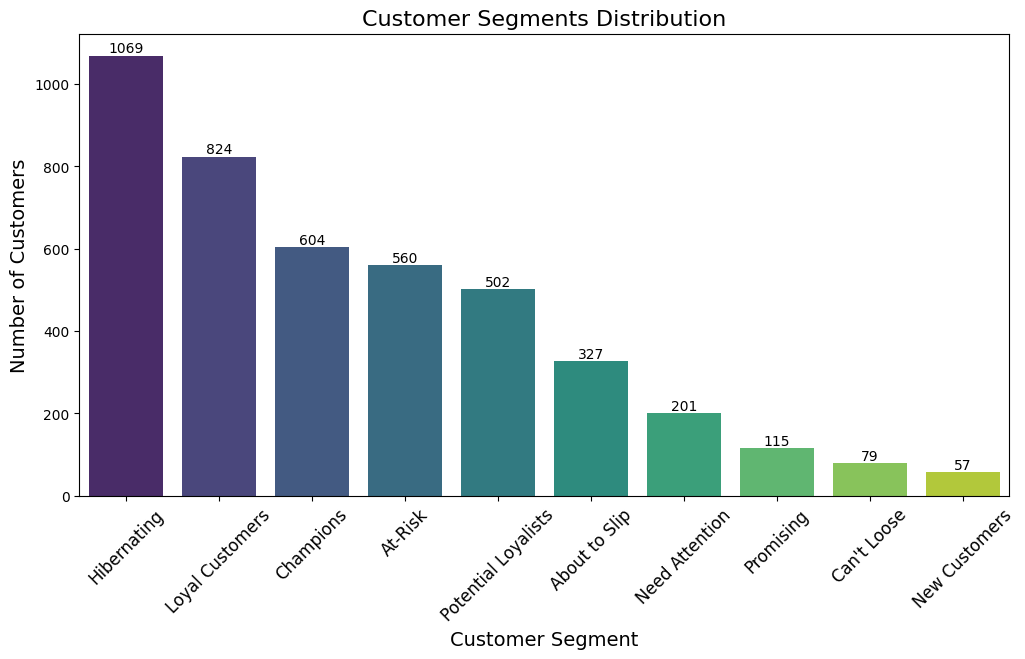

In [95]:
# Display a summary of segments
segment_summary = rfm['Segment'].value_counts()
print(segment_summary)

# Visualize the customer segments
plt.figure(figsize=(12, 6))
b = sns.barplot(x=segment_summary.index, y=segment_summary.values, palette='viridis')
for container in b.containers:  # Loop through all containers
    b.bar_label(container, fmt="%.0f", label_type='edge')
plt.title('Customer Segments Distribution', fontsize=16)
plt.xlabel('Customer Segment', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

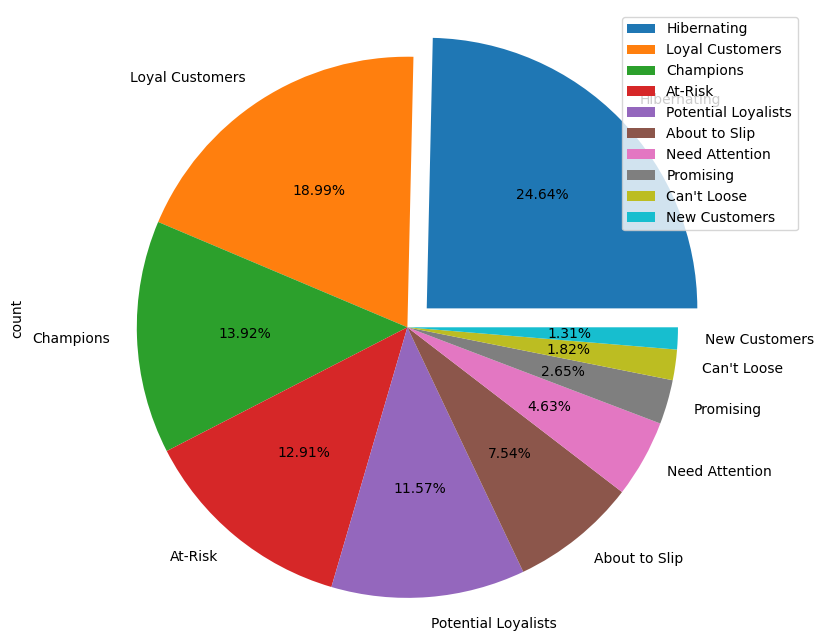

In [96]:
plt.figure(figsize = (10, 8), )
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

segment_summary.plot(
    kind = 'pie',
    color=segment_summary.index,
    explode = explode,
    autopct = '%1.2f%%')
plt.axis('equal')
plt.legend(labels = segment_summary.index, loc = "best")
plt.show()

Findings

24.64% of our customers are in the hibernation segment and that for customers who have purchased from us a few times and the last time was a long time

18.99% of our customers are loyal and usually buys from us

13.92% of our customers are champions so we are their favourtie market

11.57% of our customers have good potential that refers to customers who have bought from us recently and have not buy many times

12.91% of our cutomeers are at risk segment so we must attract them again

7.54% of our customers are about to slip and this segment of customers who last purchase from us for a fairly long time

4.63% of our customers are needing more attention to make them fall under Champions segment

1.82% of our customers can`t lost them and they purchased from us many times but last time was for a long time

# Customer Churn Analysis

Customer Churn Analysis in the context of an e-commerce dataset helps in identify customers who are likely to stop purchasing from the platform

Churn must be clearly defined based on your dataset and business context. For example:

1. No Purchase in X Months: A customer who hasn’t made a purchase in the last 6 months or year.
2. Decreasing Purchase Frequency: A customer who used to buy frequently but has slowed down.
3. Reduced Total Spending: A customer whose spending has dropped significantly compared to their historical pattern.

Using RFM metrics to find churned customers

In [97]:
# Define churn criteria
# Customers with R_Score <= 2 and F_Score <= 2 are likely to churn.
rfm['Churn'] = rfm.apply(lambda x: 1 if (x['R_Score'] <= 2 and x['F_Score'] <= 2) else 0, axis=1)

In [98]:
rfm

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment,Churn
0,12346.0,326,1.00,19780.4878,1,1,5,115,Hibernating,1
1,12347.0,2,182.00,4310.0000,5,5,5,555,Champions,0
2,12348.0,75,31.00,1797.2400,2,3,4,234,At-Risk,0
3,12349.0,19,73.00,1757.5500,4,4,4,444,Loyal Customers,0
4,12350.0,310,17.00,334.4000,1,2,2,122,Hibernating,1
...,...,...,...,...,...,...,...,...,...,...
4333,18280.0,278,10.00,180.6000,1,1,1,111,Hibernating,1
4334,18281.0,181,7.00,80.8200,1,1,1,111,Hibernating,1
4335,18282.0,8,12.00,178.0500,5,1,1,511,New Customers,0
4336,18283.0,4,655.63,2045.5300,5,5,4,554,Champions,0


### Visualize Churn

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10208\1950396928.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=rfm, palette='coolwarm')


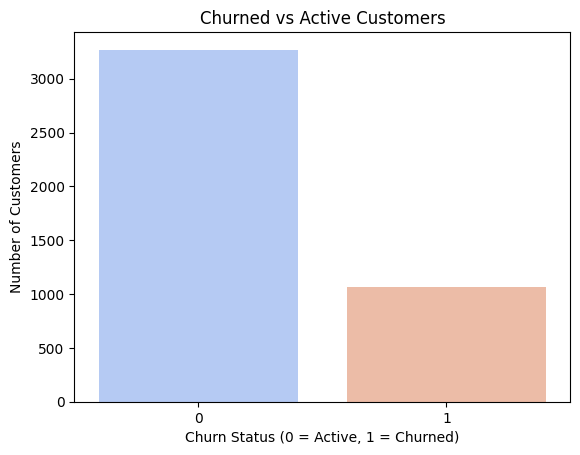

In [99]:
# Churn distribution
sns.countplot(x='Churn', data=rfm, palette='coolwarm')
plt.title('Churned vs Active Customers')
plt.xlabel('Churn Status (0 = Active, 1 = Churned)')
plt.ylabel('Number of Customers')
plt.show()

## Analyzing Churn Factors

In [100]:
# Merge the RFM metrics with the original dataset using CustomerID
merged_df = df.merge(rfm, on='CustomerID', how='inner')

merged_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Day,...,PriceCategory,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment,Churn
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wed,1,...,Low Price,369,297.0,5391.21,1,5,5,155,Can't Loose,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wed,1,...,Low Price,369,297.0,5391.21,1,5,5,155,Can't Loose,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wed,1,...,Low Price,369,297.0,5391.21,1,5,5,155,Can't Loose,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wed,1,...,Low Price,369,297.0,5391.21,1,5,5,155,Can't Loose,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wed,1,...,Low Price,369,297.0,5391.21,1,5,5,155,Can't Loose,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524873,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Fri,9,...,Low Price,1,52.0,862.81,5,3,3,533,Potential Loyalists,0
524874,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Fri,9,...,Low Price,1,52.0,862.81,5,3,3,533,Potential Loyalists,0
524875,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Fri,9,...,Low Price,1,52.0,862.81,5,3,3,533,Potential Loyalists,0
524876,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Fri,9,...,Low Price,1,52.0,862.81,5,3,3,533,Potential Loyalists,0


In [101]:
# Filter churned customers
churned_customers = merged_df[merged_df['Churn'] == 1]

### Distribution of RFM Metrics for Churned Customers

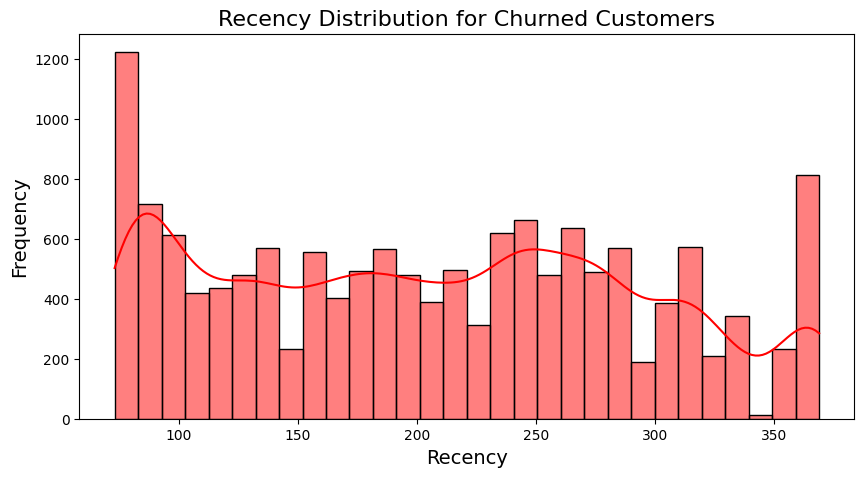

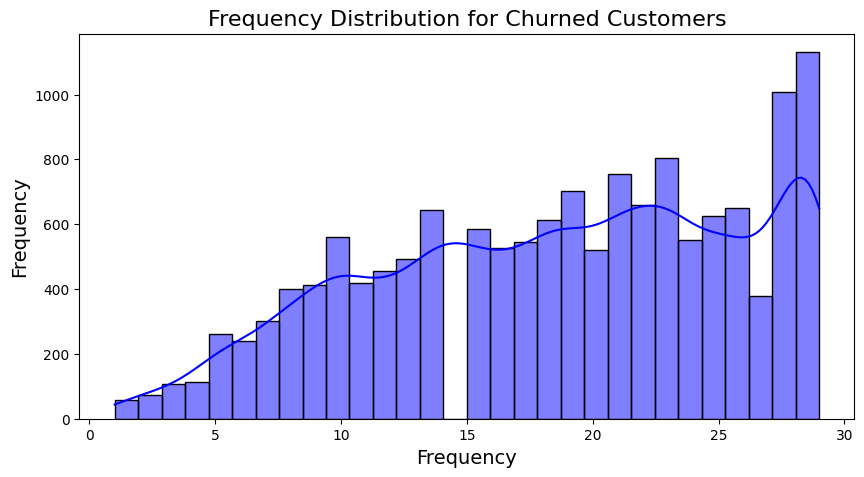

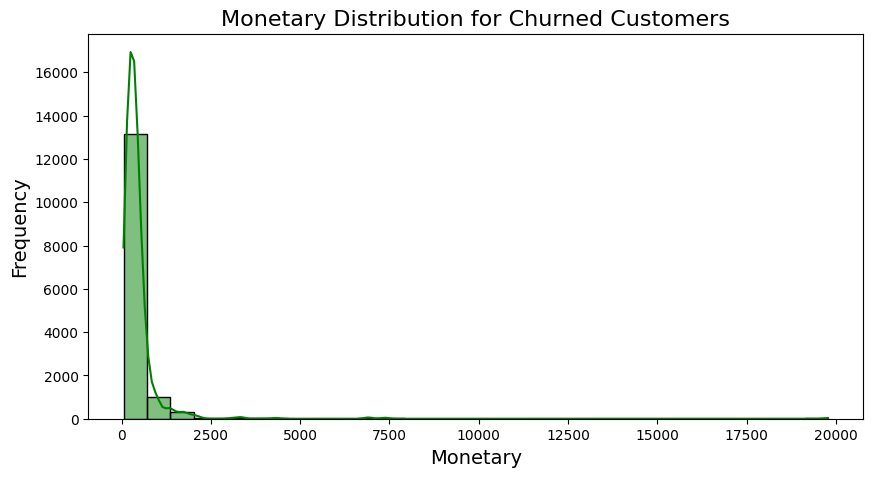

In [102]:
# Recency distribution
plt.figure(figsize=(10, 5))
sns.histplot(churned_customers['Recency'], kde=True, bins=30, color='red')
plt.title('Recency Distribution for Churned Customers', fontsize=16)
plt.xlabel('Recency', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

# Frequency distribution
plt.figure(figsize=(10, 5))
sns.histplot(churned_customers['Frequency'], kde=True, bins=30, color='blue')
plt.title('Frequency Distribution for Churned Customers', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

# Monetary Value distribution
plt.figure(figsize=(10, 5))
sns.histplot(churned_customers['Monetary'], kde=True, bins=30, color='green')
plt.title('Monetary Distribution for Churned Customers', fontsize=16)
plt.xlabel('Monetary', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

### Identify Popular Products or Categories Among Churned Customers

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10208\2532687734.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity', y='Description', data=popular_products, palette='coolwarm')


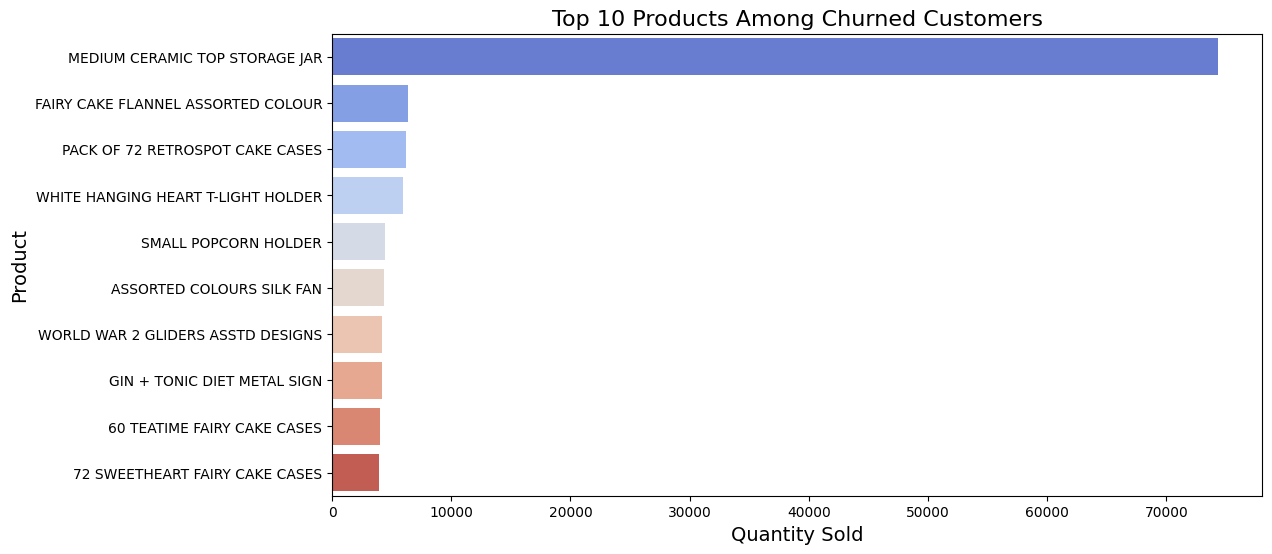

In [103]:
# Group by product description and sum quantity for churned customers
popular_products = churned_customers.groupby('Description')['Quantity'].sum().reset_index()
popular_products = popular_products.sort_values('Quantity', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='Description', data=popular_products, palette='coolwarm')
plt.title('Top 10 Products Among Churned Customers', fontsize=16)
plt.xlabel('Quantity Sold', fontsize=14)
plt.ylabel('Product', fontsize=14)
plt.show()


### Trends in Purchasing Behavior Over Time

Analyze how churned customers’ purchasing behavior evolved over time

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10208\805928979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churned_customers['InvoiceMonth'] = churned_customers['InvoiceDate'].dt.to_period('M')


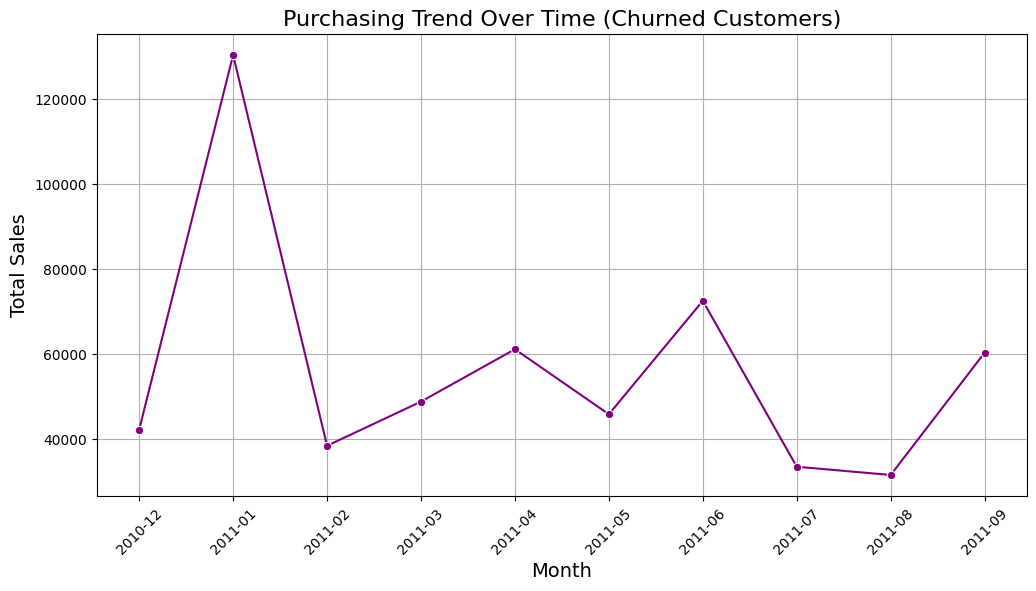

In [104]:
# Aggregate sales for churned customers by month
churned_customers['InvoiceMonth'] = churned_customers['InvoiceDate'].dt.to_period('M')
monthly_sales = churned_customers.groupby('InvoiceMonth')['TotalPrice'].sum().reset_index()

# Ensure InvoiceMonth is a string for plotting
monthly_sales['InvoiceMonth'] = monthly_sales['InvoiceMonth'].astype(str)

# Plot trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='InvoiceMonth', y='TotalPrice', data=monthly_sales, marker='o', color='purple')
plt.title('Purchasing Trend Over Time (Churned Customers)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


1. Analyze RFM Metrics Distribution
Steps:
Inspect Recency: Identify how recently churned customers made their last purchase.
Insight: If the majority have high recency scores, it suggests they haven’t engaged in a long time. Consider re-engagement strategies.
Inspect Frequency: Check how often churned customers made purchases.
Insight: Low frequency may indicate dissatisfaction, lack of need, or poor customer retention strategies.
Inspect Monetary Value: Examine the spending patterns of churned customers.
Insight: Are high-value customers churning? They might expect more personalized experiences or loyalty benefits.

2. Analyze RFM Metrics Distribution
Steps:
Inspect Recency: Identify how recently churned customers made their last purchase.
Insight: If the majority have high recency scores, it suggests they haven’t engaged in a long time. Consider re-engagement strategies.
Inspect Frequency: Check how often churned customers made purchases.
Insight: Low frequency may indicate dissatisfaction, lack of need, or poor customer retention strategies.
Inspect Monetary Value: Examine the spending patterns of churned customers.
Insight: Are high-value customers churning? They might expect more personalized experiences or loyalty benefits.

3. Trends in Purchasing Behavior
Steps:
Plot monthly/quarterly purchasing trends for churned customers.
Insight: Look for significant drops in activity or seasonal trends that might explain churn (e.g., post-holiday decline).

Derive Key Insights
Customer Retention Opportunities:

Customers with medium recency and high frequency may still be re-engaged with targeted offers.
High recency and low frequency may need a completely different retention strategy, like surveys to understand their disengagement.
Product Improvements:

Products associated with churn could benefit from customer feedback or quality improvements.
Seasonality/Trends:

Identify specific times when churn increases and implement retention strategies preemptively during those periods.
5. Recommend Actions
Use your findings to suggest business strategies:

Re-engagement Campaigns: Email offers, personalized recommendations, or loyalty programs.
Product Bundling: Promote less popular products as bundles with best-sellers.
Customer Feedback: Survey churned customers to understand dissatisfaction.

### Predict Churn Using Machine Learning

In [105]:
# Features: R_Score, F_Score, and M_Score
X = rfm[['R_Score', 'F_Score', 'M_Score']]

# Target: Churn (0 = not churned, 1 = churned)
y = rfm['Churn']

In [106]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# model training
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

# model testing
y_pred = LR_model.predict(X_test)

In [108]:
# evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9527649769585254
Confusion Matrix:
 [[652   5]
 [ 36 175]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       657
           1       0.97      0.83      0.90       211

    accuracy                           0.95       868
   macro avg       0.96      0.91      0.93       868
weighted avg       0.95      0.95      0.95       868



In [109]:
# Train Model
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(random_state=42)
RF_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = RF_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[657   0]
 [  0 211]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       657
           1       1.00      1.00      1.00       211

    accuracy                           1.00       868
   macro avg       1.00      1.00      1.00       868
weighted avg       1.00      1.00      1.00       868



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10208\2261937757.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='viridis')


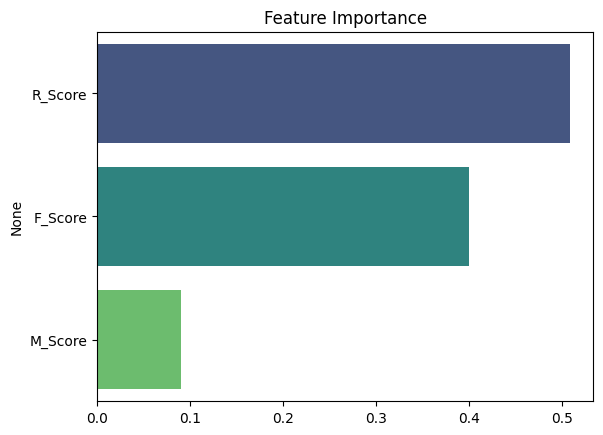

In [110]:
# Feature Importance for Random Forest
importances = RF_model.feature_importances_
features = X.columns
sns.barplot(x=importances, y=features, palette='viridis')
plt.title("Feature Importance")
plt.show()

## K-Means Clustering

In [111]:
from sklearn.preprocessing import StandardScaler

# Selecting RFM metrics
rfm_df = rfm[['Recency', 'Frequency', 'Monetary']]

# Scaling the data
scaler = StandardScaler()

rfm_scaled = scaler.fit_transform(rfm_df)

type(rfm_scaled)

numpy.ndarray

In [112]:
rfm_scaled = pd.DataFrame(rfm_scaled)
rfm_scaled.columns = ['Recency', 'Frequency', 'Monetary']
rfm_scaled

,Recency,Frequency,Monetary
0,2.337255,-0.723860,6.523541
1,-0.905880,0.892331,0.974650
2,-0.175174,-0.455983,0.073384
3,-0.735716,-0.080955,0.059148
4,2.177100,-0.580992,-0.451302
...,...,...,...
4333,1.856791,-0.643497,-0.506466
4334,0.885852,-0.670285,-0.542255
4335,-0.845822,-0.625639,-0.507381
4336,-0.885861,5.121484,0.162439


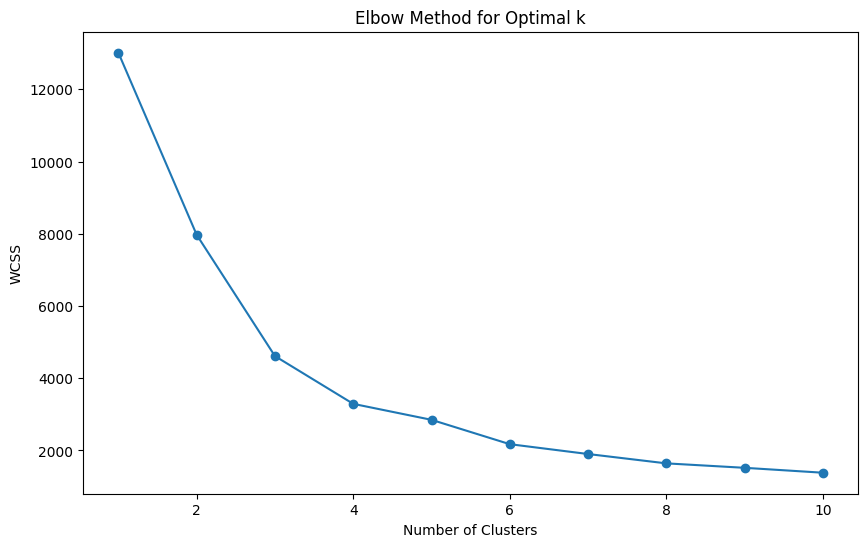

In [113]:
from sklearn.cluster import KMeans


# Elbow method
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [114]:
# Number of clusters based on elbow method
optimal_k = 4

# K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Adding cluster labels back to the original RFM data
rfm['Cluster'] = kmeans.labels_


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10208\2789786874.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)


In [115]:
rfm

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment,Churn,Cluster
0,12346.0,326,1.00,19780.4878,1,1,5,115,Hibernating,1,1
1,12347.0,2,182.00,4310.0000,5,5,5,555,Champions,0,3
2,12348.0,75,31.00,1797.2400,2,3,4,234,At-Risk,0,0
3,12349.0,19,73.00,1757.5500,4,4,4,444,Loyal Customers,0,0
4,12350.0,310,17.00,334.4000,1,2,2,122,Hibernating,1,2
...,...,...,...,...,...,...,...,...,...,...,...
4333,18280.0,278,10.00,180.6000,1,1,1,111,Hibernating,1,2
4334,18281.0,181,7.00,80.8200,1,1,1,111,Hibernating,1,2
4335,18282.0,8,12.00,178.0500,5,1,1,511,New Customers,0,0
4336,18283.0,4,655.63,2045.5300,5,5,4,554,Champions,0,3


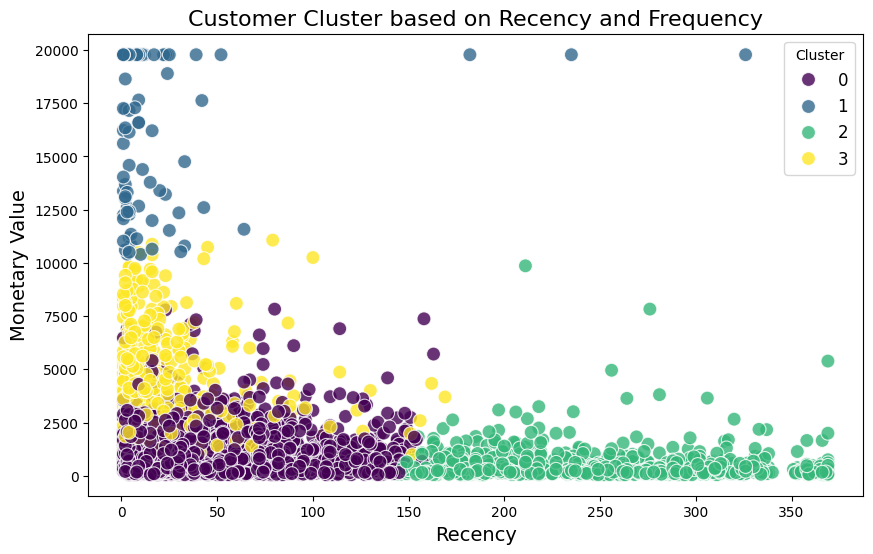

In [116]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Recency', y='Monetary', hue='Cluster', data=rfm_df,
    palette='viridis', s=100, alpha=0.8
)
plt.title('Customer Cluster based on Recency and Frequency', fontsize=16)
plt.xlabel('Recency', fontsize=14)
plt.ylabel('Monetary Value', fontsize=14)
plt.legend(title='Cluster', fontsize=12)
plt.show()


In [117]:
# from sklearn.decomposition import PCA

# # Apply PCA for dimensionality reduction
# pca = PCA(n_components=2)
# rfm_pca = pca.fit_transform(rfm_scaled)  # rfm_scaled contains standardized RFM metrics

# # Create a DataFrame with PCA components
# rfm_df['PCA1'] = rfm_pca[:, 0]
# rfm_df['PCA2'] = rfm_pca[:, 1]

# # Visualize clusters in 2D
# plt.figure(figsize=(10, 6))
# sns.scatterplot(
#     x='PCA1', y='PCA2', hue='Cluster', data=rfm_df,
#     palette='viridis', s=100, alpha=0.8
# )
# plt.title('Customer Segments Visualized with PCA', fontsize=16)
# plt.xlabel('Principal Component 1', fontsize=14)
# plt.ylabel('Principal Component 2', fontsize=14)
# plt.legend(title='Cluster', fontsize=12)
# plt.show()


### recommendations for rfm(4 clusters)
#### Cluster 0: Re-engage inactive customers with tailored offers and gather their feedback to improve.
#### Cluster 1: Recognize and reward loyal customers with exclusive perks and premium recommendations.
#### Cluster 2: Encourage consistent customers to increase spending through attractive deals and reminders.
#### Cluster 3: Provide top spenders with VIP treatment and personalized engagement to retain their loyalty.

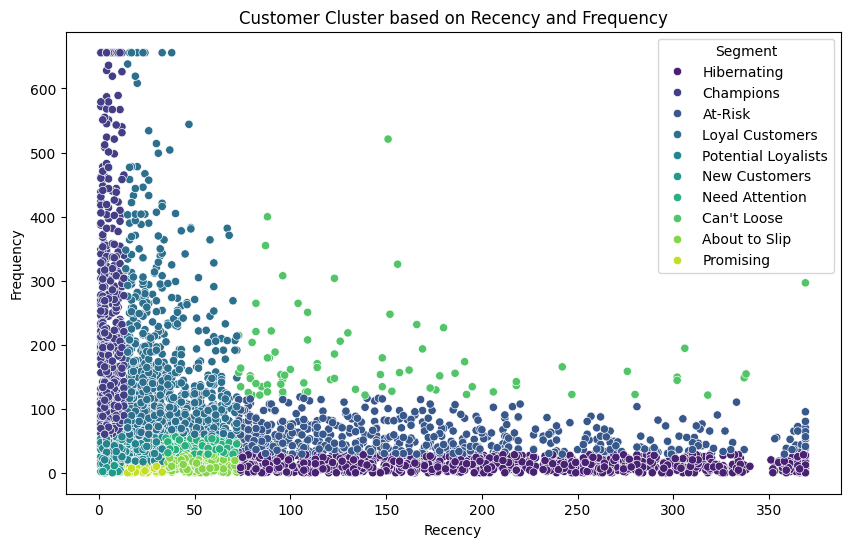

In [118]:
new_rfm = rfm[["Recency", "Frequency", "Monetary", "Segment"]]
#Convert index to integer
new_rfm.index = new_rfm.index.astype(int)
new_rfm.head()

plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Recency', y = 'Frequency', hue = 'Segment', data = new_rfm, palette = 'viridis')
plt.title('Customer Cluster based on Recency and Frequency')
plt.show()

In [119]:
# Calculate the mean of each feature for each cluster to get the summary
cluster_summary = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()

# Print the cluster summary
print(cluster_summary)

            Recency   Frequency      Monetary
Cluster                                      
0         47.060695   56.335649   1031.739453
1         17.364583  358.239271  16525.925346
2        250.476008   26.252399    460.369281
3         21.275269  301.461828   4345.999269


In [120]:
rfm

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment,Churn,Cluster
0,12346.0,326,1.00,19780.4878,1,1,5,115,Hibernating,1,1
1,12347.0,2,182.00,4310.0000,5,5,5,555,Champions,0,3
2,12348.0,75,31.00,1797.2400,2,3,4,234,At-Risk,0,0
3,12349.0,19,73.00,1757.5500,4,4,4,444,Loyal Customers,0,0
4,12350.0,310,17.00,334.4000,1,2,2,122,Hibernating,1,2
...,...,...,...,...,...,...,...,...,...,...,...
4333,18280.0,278,10.00,180.6000,1,1,1,111,Hibernating,1,2
4334,18281.0,181,7.00,80.8200,1,1,1,111,Hibernating,1,2
4335,18282.0,8,12.00,178.0500,5,1,1,511,New Customers,0,0
4336,18283.0,4,655.63,2045.5300,5,5,4,554,Champions,0,3


Insights from K-means Clustering
Customer Groups: Understand key characteristics of each cluster (e.g., high recency, low frequency).
Targeted Campaigns: Develop marketing strategies tailored to each segment.
Business Prioritization: Focus on high-value or at-risk customers.

# predicting Sales trends using RFM data frame 
## Feature Selection 

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524878 entries, 0 to 541908
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      524878 non-null  object        
 1   StockCode      524878 non-null  object        
 2   Description    524878 non-null  object        
 3   Quantity       524878 non-null  int64         
 4   InvoiceDate    524878 non-null  datetime64[ns]
 5   UnitPrice      524878 non-null  float64       
 6   CustomerID     524878 non-null  float64       
 7   Country        524878 non-null  object        
 8   WeekDay        524878 non-null  object        
 9   Day            524878 non-null  int32         
 10  Month          524878 non-null  int32         
 11  Year           524878 non-null  int32         
 12  TotalPrice     524878 non-null  float64       
 13  Hour           524878 non-null  int32         
 14  PriceCategory  524878 non-null  object        
dtypes: da

In [126]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CustomerID  4338 non-null   float64 
 1   Recency     4338 non-null   int64   
 2   Frequency   4338 non-null   float64 
 3   Monetary    4338 non-null   float64 
 4   R_Score     4338 non-null   category
 5   F_Score     4338 non-null   category
 6   M_Score     4338 non-null   category
 7   RFM_Score   4338 non-null   object  
 8   Segment     4338 non-null   object  
 9   Churn       4338 non-null   int64   
 10  Cluster     4338 non-null   int32   
dtypes: category(3), float64(3), int32(1), int64(2), object(2)
memory usage: 267.6+ KB


In [177]:
# Merging DataFrames
merged_df = pd.merge(df, rfm, on='CustomerID', how='inner')
#print(merged_df)

# Feature Selection
features = [
    'WeekDay', 'Month', 'Hour', 
    'Quantity', 'UnitPrice', 'PriceCategory', 
    'Recency', 'Frequency', 'Monetary', 
    'RFM_Score', 'Segment', 'Churn', 'Cluster'
]
# Target Variable
target = 'TotalPrice'

In [178]:
from sklearn.preprocessing import OneHotEncoder

# Converting RFM_Score to integer as it is string
merged_df['RFM_Score'] = merged_df['RFM_Score'].astype(int)
#print(merged_df.info())

# Encode categorical variables
categorical_features = ['WeekDay', 'PriceCategory', 'Segment']

encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(merged_df[categorical_features])

#print(one_hot_encoded)

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_features))
new_features = one_hot_df.columns
print(new_features)

merged_df_encoded = pd.concat([merged_df, one_hot_df], axis=1)

# Drop the original categorical columns
merged_df_encoded = merged_df_encoded.drop(categorical_features, axis=1)
print(merged_df_encoded.info())

Index(['WeekDay_Fri', 'WeekDay_Mon', 'WeekDay_Sun', 'WeekDay_Thu',
       'WeekDay_Tue', 'WeekDay_Wed', 'PriceCategory_High Price',
       'PriceCategory_Low Price', 'PriceCategory_Mid Price',
       'Segment_About to Slip', 'Segment_At-Risk', 'Segment_Can't Loose',
       'Segment_Champions', 'Segment_Hibernating', 'Segment_Loyal Customers',
       'Segment_Need Attention', 'Segment_New Customers',
       'Segment_Potential Loyalists', 'Segment_Promising'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524878 entries, 0 to 524877
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   InvoiceNo                    524878 non-null  object        
 1   StockCode                    524878 non-null  object        
 2   Description                  524878 non-null  object        
 3   Quantity                     524878 non-null  int64         
 4   Inv

In [179]:
#updated features list
for x in categorical_features:
    features.remove(x)
#print(features)
for y in new_features:
    features.append(y)
#print(features)

In [182]:
# Feature Selection (X) and Target (y)
X = merged_df_encoded[features]
y = merged_df_encoded[target]

In [183]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model creation

In [184]:
# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Predicting Values 

In [185]:
# Make predictions
y_pred = rf_model.predict(X_test)

## Evaluate the model

In [191]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Model Performance:
Mean Absolute Error (MAE): 0.25
Mean Squared Error (MSE): 199.40
Root Mean Squared Error (RMSE): 14.12
R^2 Score: 0.97


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Visualize Feature Importance

                        Feature    Importance
2                      Quantity  8.432945e-01
3                     UnitPrice  1.089062e-01
7                     RFM_Score  1.061227e-02
4                       Recency  8.208213e-03
0                         Month  6.030780e-03
5                     Frequency  5.759547e-03
26        Segment_New Customers  4.390926e-03
10                  WeekDay_Fri  3.979120e-03
23          Segment_Hibernating  3.092985e-03
8                         Churn  1.549333e-03
14                  WeekDay_Tue  1.547769e-03
1                          Hour  1.467675e-03
18      PriceCategory_Mid Price  4.938152e-04
17      PriceCategory_Low Price  1.861097e-04
16     PriceCategory_High Price  1.611964e-04
13                  WeekDay_Thu  7.657070e-05
22            Segment_Champions  5.668607e-05
6                      Monetary  5.547100e-05
11                  WeekDay_Mon  4.551190e-05
24      Segment_Loyal Customers  3.523764e-05
15                  WeekDay_Wed  2

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10208\590112151.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='coolwarm')


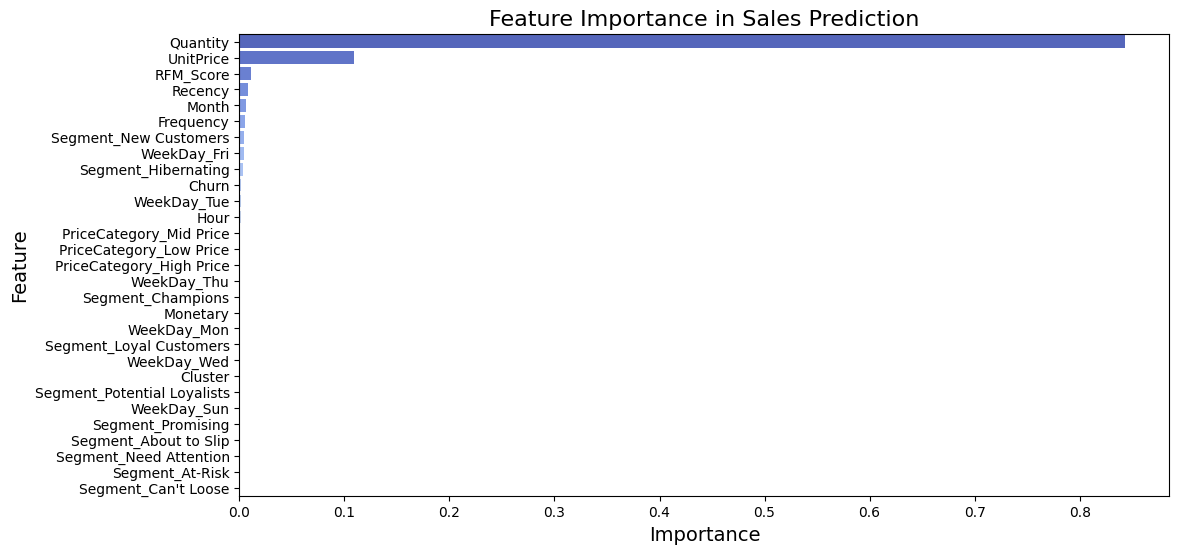

In [192]:
# Step 5: Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

# Step 6: Visualize Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='coolwarm')
plt.title('Feature Importance in Sales Prediction', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.show()

## Example Prediction for a New Data Point

In [81]:
# # Replace with actual input values: [Recency, Frequency, Cluster]
# new_data = [[30, 5, 2]]  
# predicted_sales = rf_model.predict(new_data)
# print(f"Predicted Sales for the input {new_data}: {predicted_sales[0]:.2f}")

Predicted Sales for the input [[30, 5, 2]]: 1517.86


# predicting Sales trends using main data set
## Encode categorical variables (if any)

In [193]:
df['WeekDay'] = df['WeekDay'].astype('category').cat.codes

## Select features and target variable

In [196]:
features = ['Quantity', 'UnitPrice', 'Month', 'Day', 'WeekDay']
target = 'TotalPrice'
X = df[features]
y = df[target]

## Split data into training and test sets

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the Random Forest Regressor

In [198]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Make predictions on the test set

In [199]:
y_pred = rf_model.predict(X_test)

## Evaluate the model

In [200]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Model Evaluation:
Mean Absolute Error (MAE): 0.21
Root Mean Squared Error (RMSE): 12.20
R^2 Score: 0.98


## Feature Importance

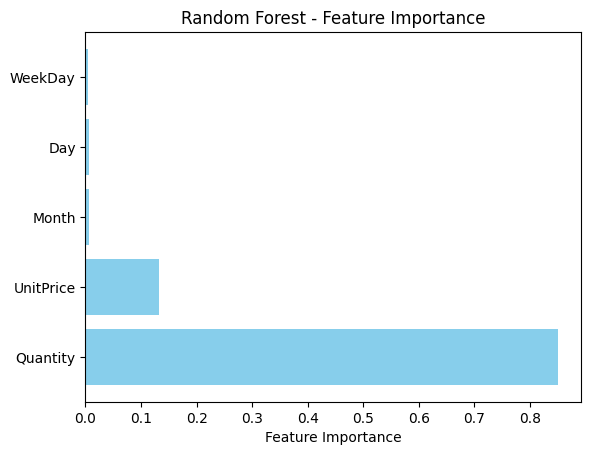

In [201]:
importances = rf_model.feature_importances_
plt.barh(features, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest - Feature Importance')
plt.show()

##  Example predictions (show first few predicted sales)

In [202]:
print(f"Predicted sales for the first few test samples: {y_pred[:5]}")

Predicted sales for the first few test samples: [ 2.25 39.6  10.2  61.95  4.89]
